In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdatuneq

In [142]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=100.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0.0 #math.pi/6. #math.pi/6.
mass0_1=20.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
100.0
(array([3.14159265, 0.        ]), 0.0, 50, 100.0, array([20.,  3.]))


In [143]:
import getxyuvtwouneq_apper #unequal mass version

In [144]:
useperihelion=True

In [145]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 50 [3.14159265 0.        ] 100.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
hyperbola
(array([20.,  3.]), array([[-6.45652174e+02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -8.93542933e-02,  0.00000000e+00],
       [ 4.30434783e+03,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  5.95695288e-01,  0.00000000e+00]]), array([[ 1.22436486e-07, -0.00000000e+00,  0.00000000e+00],
       [-8.16243240e-07, -0.00000000e+00,  0.00000000e+00]]))


In [146]:
import RK4implicit

In [147]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [148]:
import OrbitDiffEqAdaptive

In [149]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[20.  3.] [[-6.45652174e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -8.93542933e-02  0.00000000e+00]
 [ 4.30434783e+03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   5.95695288e-01  0.00000000e+00]] 0.0
[20.  3.] [[-6.45652174e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -8.93542933e-02  0.00000000e+00]
 [ 4.30434783e+03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   5.95695288e-01  0.00000000e+00]] 0.0


In [150]:
print(xyuvaequneq)

(array([20.,  3.]), array([[-6.45652174e+02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -8.93542933e-02,  0.00000000e+00],
       [ 4.30434783e+03,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  5.95695288e-01,  0.00000000e+00]]), array([[ 1.22436486e-07, -0.00000000e+00,  0.00000000e+00],
       [-8.16243240e-07, -0.00000000e+00,  0.00000000e+00]]))


In [151]:
import timestepAdaptive

In [152]:
import parabfns

In [153]:
import ellipsefns

In [154]:
import hyperbfns

In [155]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-1.83035809e-11  8.93542933e-04  0.00000000e+00]
[3.35021073e-22 7.98418972e-07 0.00000000e+00]
7.984189723319812e-07
0.0008935429325622699
167.8710608452456 False
0.03239563283842953
[-2.32375896e-10  2.89468888e-03  0.00000000e+00]
[5.39985572e-20 8.37922369e-06 0.00000000e+00]
8.379223693847082e-06
0.0028946888768651945
51.8190404498471 False
0.07822603524101646
[-1.52988378e-09  6.98983209e-03  0.00000000e+00]
[2.34054437e-18 4.88577527e-05 0.00000000e+00]
4.8857752690860286e-05
0.0069898320931808
21.45974295238626 False
0.15153046559067024
[-6.45479759e-09  1.35398977e-02  0.00000000e+00]
[4.16644119e-17 1.83328829e-04 0.00000000e+00]
0.00018332882862933644
0.013539897659485335
11.078370292918569 False
0.24880633638819064
[-1.96596375e-08  2.22319143e-02  0.00000000e+00]
[3.86501346e-16 4.94258015e-04 0.00000000e+00]
0.0004942580154326657
0.022231914344758207
6.747057301224565 False
0.36089639630369097
[-4.69399311e-08  3.22476424e-02  0.00000000e+00]
[2.20335713e-15 1.03991

0.9
[-1.16245263e-05  8.04187791e-02  0.00000000e+00]
[1.35129613e-10 6.46718003e-03 0.00000000e+00]
0.0064671801621250065
0.08041877990945279
1.865235958179071 False
0.9
[-1.17236681e-05  8.04187776e-02  0.00000000e+00]
[1.37444393e-10 6.46717979e-03 0.00000000e+00]
0.006467179930622045
0.08041877847009395
1.8652359915636103 False
0.9
[-1.18228094e-05  8.04187761e-02  0.00000000e+00]
[1.39778821e-10 6.46717956e-03 0.00000000e+00]
0.006467179697153943
0.08041877701851691
1.86523602523154 False
0.9
[-1.19219501e-05  8.04187747e-02  0.00000000e+00]
[1.42132894e-10 6.46717932e-03 0.00000000e+00]
0.006467179461720412
0.08041877555471988
1.865236059182902 False
0.9
[-1.20210902e-05  8.04187732e-02  0.00000000e+00]
[1.44506611e-10 6.46717908e-03 0.00000000e+00]
0.006467179224322024
0.08041877407870641
1.8652360934176135 False
0.9
[-1.21202298e-05  8.04187717e-02  0.00000000e+00]
[1.46899971e-10 6.46717884e-03 0.00000000e+00]
0.006467178984958492
0.08041877259047474
1.8652361279357161 False
0

0.9
[-2.35163880e-05  8.04185166e-02  0.00000000e+00]
[5.53020502e-10 6.46713781e-03 0.00000000e+00]
0.006467138361691102
0.08041852001679155
1.865241986157911 False
0.9
[-2.36154322e-05  8.04185136e-02  0.00000000e+00]
[5.57688636e-10 6.46713734e-03 0.00000000e+00]
0.006467137894673428
0.08041851711312158
1.8652420535061704 False
0.9
[-2.37144751e-05  8.04185107e-02  0.00000000e+00]
[5.62376330e-10 6.46713686e-03 0.00000000e+00]
0.006467137425696545
0.08041851419727018
1.8652421211369727 False
0.9
[-2.38135171e-05  8.04185077e-02  0.00000000e+00]
[5.67083599e-10 6.46713639e-03 0.00000000e+00]
0.0064671369547599
0.0804185112692339
1.8652421890503987 False
0.9
[-2.39125579e-05  8.04185048e-02  0.00000000e+00]
[5.71810427e-10 6.46713591e-03 0.00000000e+00]
0.006467136481864616
0.08041850832901973
1.865242257246286 False
0.9
[-2.40115977e-05  8.04185018e-02  0.00000000e+00]
[5.76556824e-10 6.46713543e-03 0.00000000e+00]
0.006467136007010133
0.08041850537662419
1.8652423257247148 False
0.9

0.9
[-3.58870125e-05  8.04180548e-02  0.00000000e+00]
[1.28787766e-09 6.46706353e-03 0.00000000e+00]
0.006467064822567736
0.08041806278795664
1.8652525912681386 False
0.9
[-3.59858852e-05  8.04180503e-02  0.00000000e+00]
[1.29498394e-09 6.46706282e-03 0.00000000e+00]
0.0064670641112166815
0.0804180583651252
1.8652526938532792 False
0.9
[-3.60847562e-05  8.04180458e-02  0.00000000e+00]
[1.30210963e-09 6.46706210e-03 0.00000000e+00]
0.006467063397916028
0.08041805393017185
1.8652527967195918 False
0.9
[-3.61836256e-05  8.04180413e-02  0.00000000e+00]
[1.30925476e-09 6.46706137e-03 0.00000000e+00]
0.006467062682666368
0.0804180494831003
1.8652528998669908 False
0.9
[-3.62824933e-05  8.04180368e-02  0.00000000e+00]
[1.31641932e-09 6.46706065e-03 0.00000000e+00]
0.006467061965467108
0.08041804502390684
1.8652530032955623 False
0.9
[-3.63813592e-05  8.04180323e-02  0.00000000e+00]
[1.32360330e-09 6.46705992e-03 0.00000000e+00]
0.006467061246319396
0.08041804055259862
1.865253107005141 False


0.9
[-4.79359187e-05  8.04174197e-02  0.00000000e+00]
[2.29785230e-09 6.46696138e-03 0.00000000e+00]
0.0064669636819851455
0.08041743394305208
1.865267177092757 False
0.9
[-4.80345559e-05  8.04174137e-02  0.00000000e+00]
[2.30731856e-09 6.46696043e-03 0.00000000e+00]
0.006466962733633967
0.08041742804662412
1.8652673138592986 False
0.9
[-4.81331911e-05  8.04174077e-02  0.00000000e+00]
[2.31680408e-09 6.46695947e-03 0.00000000e+00]
0.006466961783347931
0.08041742213816562
1.8652674509049068 False
0.9
[-4.82318239e-05  8.04174018e-02  0.00000000e+00]
[2.32630884e-09 6.46695850e-03 0.00000000e+00]
0.006466960831127019
0.0804174162176765
1.865267588229583 False
0.9
[-4.83304547e-05  8.04173958e-02  0.00000000e+00]
[2.33583285e-09 6.46695754e-03 0.00000000e+00]
0.006466959876970094
0.08041741028514966
1.8652677258334922 False
0.9
[-4.84290831e-05  8.04173898e-02  0.00000000e+00]
[2.34537609e-09 6.46695658e-03 0.00000000e+00]
0.006466958920880575
0.08041740434060636
1.8652678637161415 False


[3.61787237e-09 6.46682775e-03 0.00000000e+00]
0.006466831370945068
0.08041661128737687
1.8652862586308179 False
0.9
[-6.02470820e-05  8.04165813e-02  0.00000000e+00]
[3.62971090e-09 6.46682655e-03 0.00000000e+00]
0.006466830183694572
0.08041660390550308
1.8652864298555036 False
0.9
[-6.03454095e-05  8.04165739e-02  0.00000000e+00]
[3.64156844e-09 6.46682535e-03 0.00000000e+00]
0.006466828994526183
0.08041659651170387
1.8652866013568348 False
0.9
[-6.04437339e-05  8.04165664e-02  0.00000000e+00]
[3.65344497e-09 6.46682415e-03 0.00000000e+00]
0.006466827803442144
0.0804165891059932
1.865286773134487 False
0.9
[-6.05420557e-05  8.04165589e-02  0.00000000e+00]
[3.66534051e-09 6.46682295e-03 0.00000000e+00]
0.006466826610440212
0.08041658168835711
1.8652869451887848 False
0.9
[-6.06403746e-05  8.04165514e-02  0.00000000e+00]
[3.67725503e-09 6.46682174e-03 0.00000000e+00]
0.00646682541552034
0.08041657425879531
1.8652871175197347 False
0.9
[-6.07386909e-05  8.04165439e-02  0.00000000e+00]
[

1.865308569324605 False
0.9
[-7.19274668e-05  8.04156085e-02  0.00000000e+00]
[5.17356048e-09 6.46667009e-03 0.00000000e+00]
0.0064666752599616285
0.08041564064261149
1.8653087732850369 False
0.9
[-7.20254352e-05  8.04155996e-02  0.00000000e+00]
[5.18766332e-09 6.46666866e-03 0.00000000e+00]
0.006466673843879933
0.08041563183784564
1.8653089775190472 False
0.9
[-7.21234003e-05  8.04155907e-02  0.00000000e+00]
[5.20178487e-09 6.46666722e-03 0.00000000e+00]
0.006466672425902967
0.08041562302129461
1.8653091820264698 False
0.9
[-7.22213621e-05  8.04155818e-02  0.00000000e+00]
[5.21592514e-09 6.46666579e-03 0.00000000e+00]
0.006466671006030732
0.0804156141929584
1.8653093868073045 False
0.9
[-7.23193207e-05  8.04155728e-02  0.00000000e+00]
[5.23008414e-09 6.46666435e-03 0.00000000e+00]
0.006466669584262099
0.08041560535282999
1.8653095918617144 False
0.9
[-7.24172760e-05  8.04155639e-02  0.00000000e+00]
[5.24426186e-09 6.46666292e-03 0.00000000e+00]
0.0064666681605970505
0.0804155965009092

0.9
[-8.38541645e-05  8.04144361e-02  0.00000000e+00]
[7.03152090e-09 6.46648153e-03 0.00000000e+00]
0.0064664885631402925
0.08041447981017033
1.8653357001636528 False
0.9
[-8.39517015e-05  8.04144258e-02  0.00000000e+00]
[7.04788819e-09 6.46647987e-03 0.00000000e+00]
0.006466486917247522
0.08041446957636121
1.8653359375523915 False
0.9
[-8.40492348e-05  8.04144154e-02  0.00000000e+00]
[7.06427388e-09 6.46647821e-03 0.00000000e+00]
0.006466485269483242
0.08041445933091412
1.8653361752111508 False
0.9
[-8.41467644e-05  8.04144050e-02  0.00000000e+00]
[7.08067796e-09 6.46647654e-03 0.00000000e+00]
0.006466483619847449
0.08041444907382907
1.8653364131399315 False
0.9
[-8.42442901e-05  8.04143947e-02  0.00000000e+00]
[7.09710041e-09 6.46647487e-03 0.00000000e+00]
0.006466481968344693
0.08041443880513433
1.8653366513380771 False
0.9
[-8.43418120e-05  8.04143843e-02  0.00000000e+00]
[7.11354125e-09 6.46647320e-03 0.00000000e+00]
0.006466480314970422
0.08041442852480159
1.8653368898062452 Fal

0.9
[-9.59185178e-05  8.04130653e-02  0.00000000e+00]
[9.20036205e-09 6.46626108e-03 0.00000000e+00]
0.006466270277233811
0.08041312254373544
1.8653671845464943 False
0.9
[-9.60155522e-05  8.04130536e-02  0.00000000e+00]
[9.21898627e-09 6.46625918e-03 0.00000000e+00]
0.006466268401133924
0.0804131108783507
1.8653674551519421 False
0.9
[-9.61125825e-05  8.04130418e-02  0.00000000e+00]
[9.23762851e-09 6.46625729e-03 0.00000000e+00]
0.006466266523194244
0.08041309920152465
1.8653677260228763 False
0.9
[-9.62096084e-05  8.04130300e-02  0.00000000e+00]
[9.25628875e-09 6.46625539e-03 0.00000000e+00]
0.006466264643412465
0.08041308751324293
1.8653679971596298 False
0.9
[-9.63066299e-05  8.04130181e-02  0.00000000e+00]
[9.27496696e-09 6.46625349e-03 0.00000000e+00]
0.006466262761788561
0.08041307581350536
1.8653682685622073 False
0.9
[-9.64036471e-05  8.04130063e-02  0.00000000e+00]
[9.29366318e-09 6.46625158e-03 0.00000000e+00]
0.0064662608783248605
0.08041306410232643
1.8653685402302727 Fals

0.9
[-0.00010792  0.08041152  0.        ]
[1.16460034e-08 6.46601203e-03 0.00000000e+00]
0.0064660236774126785
0.08041158919840273
1.865402754693717 False
0.9
[-0.00010801  0.0804115   0.        ]
[1.16668339e-08 6.46600991e-03 0.00000000e+00]
0.006466021574946041
0.08041157612524481
1.865403057967275 False
0.9
[-0.00010811  0.08041149  0.        ]
[1.16876819e-08 6.46600778e-03 0.00000000e+00]
0.006466019470668963
0.08041156304082743
1.8654033615021308 False
0.9
[-0.00010821  0.08041148  0.        ]
[1.17085476e-08 6.46600566e-03 0.00000000e+00]
0.006466017364586061
0.08041154994517928
1.8654036652976191 False
0.9
[-0.0001083   0.08041146  0.        ]
[1.17294308e-08 6.46600353e-03 0.00000000e+00]
0.0064660152566904045
0.08041153683825726
1.86540396935474 False
0.9
[-0.0001084   0.08041145  0.        ]
[1.17503316e-08 6.46600140e-03 0.00000000e+00]
0.006466013146991205
0.08041152372011866
1.8654042736721648 False
0.9
[-0.0001085   0.08041144  0.        ]
[1.17712499e-08 6.46599926e-03

1.8654423388979844 False
0.9
[-0.00011994  0.08040978  0.        ]
[1.43848114e-08 6.46573256e-03 0.00000000e+00]
0.006465746941042913
0.08040986843070266
1.865442674231835 False
0.9
[-0.00012003  0.08040976  0.        ]
[1.44078093e-08 6.46573021e-03 0.00000000e+00]
0.0064657446146942875
0.0804098539651347
1.8654430098211499 False
0.9
[-0.00012013  0.08040975  0.        ]
[1.44308242e-08 6.46572786e-03 0.00000000e+00]
0.006465742286569176
0.08040983948851768
1.8654433456669144 False
0.9
[-0.00012022  0.08040974  0.        ]
[1.44538563e-08 6.46572550e-03 0.00000000e+00]
0.006465739956674407
0.08040982500089405
1.8654436817681446 False
0.9
[-0.00012032  0.08040972  0.        ]
[1.44769054e-08 6.46572315e-03 0.00000000e+00]
0.006465737625009976
0.08040981050226381
1.8654440181248404 False
0.9
[-0.00012042  0.08040971  0.        ]
[1.44999716e-08 6.46572079e-03 0.00000000e+00]
0.00646573529157134
0.08040979599259869
1.8654443547376582 False
0.9
[-0.00012051  0.08040969  0.        ]
[1.45

0.9
[-0.00013168  0.0804079   0.        ]
[1.73405899e-08 6.46543025e-03 0.00000000e+00]
0.0064654475942851515
0.08040800702843685
1.8654858582299079 False
0.9
[-0.00013178  0.08040788  0.        ]
[1.73656600e-08 6.46542769e-03 0.00000000e+00]
0.006465445052248885
0.08040799122132629
1.8654862249588955 False
0.9
[-0.00013187  0.08040787  0.        ]
[1.73907466e-08 6.46542512e-03 0.00000000e+00]
0.0064654425084814315
0.08040797540344759
1.8654865919378512 False
0.9
[-0.00013197  0.08040785  0.        ]
[1.74158498e-08 6.46542255e-03 0.00000000e+00]
0.006465439962978278
0.08040795957477267
1.865486959167426 False
0.9
[-0.00013206  0.08040784  0.        ]
[1.74409696e-08 6.46541997e-03 0.00000000e+00]
0.006465437415741587
0.08040794373531503
1.8654873266473082 False
0.9
[-0.00013216  0.08040782  0.        ]
[1.7466106e-08 6.4654174e-03 0.0000000e+00]
0.006465434866771447
0.08040792788507516
1.8654876943774856 False
0.9
[-0.00013225  0.0804078   0.        ]
[1.74912589e-08 6.46541482e-03

0.08040598246451172
1.86553282980162 False
0.9
[-0.00014344  0.08040584  0.        ]
[2.05744347e-08 6.46509869e-03 0.00000000e+00]
0.006465119263306492
0.08040596534652446
1.865533226963287 False
0.9
[-0.00014353  0.08040582  0.        ]
[2.06015285e-08 6.46509591e-03 0.00000000e+00]
0.0064651165088322644
0.08040594821797865
1.8655336243700962 False
0.9
[-0.00014363  0.0804058   0.        ]
[2.06286383e-08 6.46509312e-03 0.00000000e+00]
0.006465113752669855
0.08040593107893133
1.865534022020725 False
0.9
[-0.00014372  0.08040579  0.        ]
[2.06557642e-08 6.46509034e-03 0.00000000e+00]
0.00646511099481247
0.08040591392934024
1.8655344199161545 False
0.9
[-0.00014382  0.08040577  0.        ]
[2.06829061e-08 6.46508755e-03 0.00000000e+00]
0.0064651082352668665
0.08040589676924738
1.86553481805541 False
0.9
[-0.00014391  0.08040575  0.        ]
[2.07100640e-08 6.46508476e-03 0.00000000e+00]
0.006465105474030788
0.08040587959863874
1.8655352164388173 False
0.9
[-0.000144    0.08040573  

0.9
[-0.000155    0.08040363  0.        ]
[2.40259432e-08 6.46474385e-03 0.00000000e+00]
0.0064647678767555915
0.08040378023921257
1.8655839259513527 False
0.9
[-0.0001551   0.08040361  0.        ]
[2.40549756e-08 6.46474086e-03 0.00000000e+00]
0.006464764916858785
0.08040376183275745
1.8655843530307086 False
0.9
[-0.00015519  0.08040359  0.        ]
[2.40840234e-08 6.46473787e-03 0.00000000e+00]
0.006464761955319057
0.08040374341608142
1.8655847803474128 False
0.9
[-0.00015528  0.08040358  0.        ]
[2.41130866e-08 6.46473488e-03 0.00000000e+00]
0.006464758992127298
0.08040372498912782
1.8655852079027804 False
0.9
[-0.00015538  0.08040356  0.        ]
[2.41421653e-08 6.46473189e-03 0.00000000e+00]
0.006464756027292614
0.08040370655195328
1.8655856356954974 False
0.9
[-0.00015547  0.08040354  0.        ]
[2.41712595e-08 6.46472889e-03 0.00000000e+00]
0.006464753060810465
0.08040368810452954
1.8655860637262205 False
0.9
[-0.00015556  0.08040352  0.        ]
[2.42003691e-08 6.46472589e

0.08040147931329016
1.8656373151483219 False
0.9
[-0.00016637  0.08040129  0.        ]
[2.76806363e-08 6.46436704e-03 0.00000000e+00]
0.006464394719240099
0.08040145968351631
1.8656377706380447 False
0.9
[-0.00016647  0.08040127  0.        ]
[2.77115201e-08 6.46436385e-03 0.00000000e+00]
0.006464391561112552
0.0804014400437738
1.8656382263593032 False
0.9
[-0.00016656  0.08040125  0.        ]
[2.77424187e-08 6.46436066e-03 0.00000000e+00]
0.006464388401387355
0.08040142039409102
1.8656386823114384 False
0.9
[-0.00016665  0.08040123  0.        ]
[2.77733321e-08 6.46435747e-03 0.00000000e+00]
0.006464385240055325
0.08040140073441088
1.8656391384957765 False
0.9
[-0.00016675  0.08040121  0.        ]
[2.78042605e-08 6.46435427e-03 0.00000000e+00]
0.006464382077125712
0.08040138106479087
1.8656395949109825 False
0.9
[-0.00016684  0.08040119  0.        ]
[2.78352037e-08 6.46435108e-03 0.00000000e+00]
0.006464378912598366
0.08040136138523007
1.8656400515570792 False
0.9
[-0.00016693  0.080401

0.9
[-0.00017654  0.08039905  0.        ]
[3.11659225e-08 6.46400664e-03 0.00000000e+00]
0.006464037809662688
0.08039924010625155
1.8656892751942384 False
0.9
[-0.00017663  0.08039903  0.        ]
[3.11984120e-08 6.46400328e-03 0.00000000e+00]
0.006464034477740374
0.08039921938514312
1.865689756034103 False
0.9
[-0.00017672  0.080399    0.        ]
[3.12309158e-08 6.46399991e-03 0.00000000e+00]
0.006464031144261116
0.08039919865434678
1.8656902370990267 False
0.9
[-0.00017681  0.08039898  0.        ]
[3.12634339e-08 6.46399655e-03 0.00000000e+00]
0.006464027809224912
0.08039917791386247
1.865690718389011 False
0.9
[-0.00017691  0.08039896  0.        ]
[3.12959662e-08 6.46399318e-03 0.00000000e+00]
0.006464024472631718
0.08039915716368996
1.865691199904062 False
0.9
[-0.000177    0.08039894  0.        ]
[3.13285130e-08 6.46398981e-03 0.00000000e+00]
0.006464021134486183
0.08039913640385811
1.8656916816435103 False
0.9
[-0.00017709  0.08039892  0.        ]
[3.13610739e-08 6.46398643e-03 

0.9
[-0.00018725  0.08039653  0.        ]
[3.50629750e-08 6.46360245e-03 0.00000000e+00]
0.006463637509266283
0.0803967506138543
1.865747046425423 False
0.9
[-0.00018734  0.08039651  0.        ]
[3.50971039e-08 6.46359890e-03 0.00000000e+00]
0.006463633997846407
0.08039672877578047
1.865747553216214 False
0.9
[-0.00018743  0.08039649  0.        ]
[3.51312465e-08 6.46359535e-03 0.00000000e+00]
0.006463630484919436
0.08039670692832783
1.865748060224932 False
0.9
[-0.00018752  0.08039647  0.        ]
[3.51654027e-08 6.46359181e-03 0.00000000e+00]
0.006463626970476141
0.08039668507143899
1.8657485674529093 False
0.9
[-0.00018762  0.08039644  0.        ]
[3.51995727e-08 6.46358825e-03 0.00000000e+00]
0.006463623454534887
0.08039666320522816
1.8657490748974959 False
0.9
[-0.00018771  0.08039642  0.        ]
[3.52337564e-08 6.46358470e-03 0.00000000e+00]
0.006463619937072732
0.08039664132955264
1.865749582562004 False
0.9
[-0.0001878  0.0803964  0.       ]
[3.52679537e-08 6.46358115e-03 0.000

0.9
[-0.00019723  0.08039405  0.        ]
[3.88981397e-08 6.46320339e-03 0.00000000e+00]
0.006463242292403816
0.08039429266063491
1.865804089267739 False
0.9
[-0.00019732  0.08039403  0.        ]
[3.89337436e-08 6.46319968e-03 0.00000000e+00]
0.006463238617427033
0.08039426980467596
1.8658046197127793 False
0.9
[-0.00019741  0.080394    0.        ]
[3.89693607e-08 6.46319597e-03 0.00000000e+00]
0.0064632349409929615
0.08039424693964713
1.8658051503686166 False
0.9
[-0.0001975   0.08039398  0.        ]
[3.90049909e-08 6.46319226e-03 0.00000000e+00]
0.006463231263087845
0.08039422406546284
1.8658056812372372 False
0.9
[-0.00019759  0.08039396  0.        ]
[3.90406342e-08 6.46318854e-03 0.00000000e+00]
0.006463227583725389
0.08039420118220834
1.8658062123166637 False
0.9
[-0.00019768  0.08039394  0.        ]
[3.90762905e-08 6.46318483e-03 0.00000000e+00]
0.006463223902905591
0.0803941782898836
1.8658067436068968 False
0.9
[-0.00019777  0.08039391  0.        ]
[3.91119600e-08 6.46318111e-0

0.9
[-0.00020764  0.08039131  0.        ]
[4.31142635e-08 6.46276323e-03 0.00000000e+00]
0.006462806344946673
0.0803915813064196
1.8658670169487246 False
0.9
[-0.00020773  0.08039129  0.        ]
[4.31513518e-08 6.46275935e-03 0.00000000e+00]
0.00646280250312262
0.08039155741197343
1.8658675715325694 False
0.9
[-0.00020782  0.08039126  0.        ]
[4.31884526e-08 6.46275547e-03 0.00000000e+00]
0.006462798659886475
0.08039153350873757
1.8658681263207506 False
0.9
[-0.00020791  0.08039124  0.        ]
[4.32255659e-08 6.46275159e-03 0.00000000e+00]
0.00646279481523362
0.08039150959668329
1.865868681313935 False
0.9
[-0.000208    0.08039122  0.        ]
[4.32626916e-08 6.46274771e-03 0.00000000e+00]
0.00646279096917319
0.08039148567586737
1.8658692365108052 False
0.9
[-0.00020809  0.08039119  0.        ]
[4.32998297e-08 6.46274382e-03 0.00000000e+00]
0.006462787121700659
0.0803914617462617
1.8658697919120144 False
0.9
[-0.00020818  0.08039117  0.        ]
[4.33369804e-08 6.46273994e-03 0.0

0.9
[-0.00021732  0.08038863  0.        ]
[4.72291493e-08 6.46233213e-03 0.00000000e+00]
0.006462379363142667
0.0803889256250055
1.8659286566375195 False
0.9
[-0.00021741  0.08038861  0.        ]
[4.72675646e-08 6.46232810e-03 0.00000000e+00]
0.006462375369927654
0.08038890078815392
1.865929233132442 False
0.9
[-0.0002175   0.08038858  0.        ]
[4.73059918e-08 6.46232407e-03 0.00000000e+00]
0.006462371375350317
0.08038887594282132
1.8659298098245758 False
0.9
[-0.00021759  0.08038856  0.        ]
[4.73444309e-08 6.46232003e-03 0.00000000e+00]
0.006462367379406136
0.0803888510889796
1.8659303867145738 False
0.9
[-0.00021768  0.08038853  0.        ]
[4.73828817e-08 6.46231600e-03 0.00000000e+00]
0.006462363382104146
0.08038882622668492
1.8659309638011332 False
0.9
[-0.00021776  0.08038851  0.        ]
[4.74213445e-08 6.46231196e-03 0.00000000e+00]
0.006462359383435304
0.08038880135588106
1.8659315410855588 False
0.9
[-0.00021785  0.08038848  0.        ]
[4.74598191e-08 6.46230792e-03 

0.9
[-0.00022786  0.08038556  0.        ]
[5.19221385e-08 6.46183864e-03 0.00000000e+00]
0.006461890562699584
0.08038588534500062
1.8659992280514062 False
0.9
[-0.00022795  0.08038554  0.        ]
[5.19619377e-08 6.46183445e-03 0.00000000e+00]
0.006461886408991888
0.08038585950894528
1.8659998277844887 False
0.9
[-0.00022804  0.08038551  0.        ]
[5.20017480e-08 6.46183025e-03 0.00000000e+00]
0.006461882253967013
0.08038583366468878
1.8660004277083306 False
0.9
[-0.00022813  0.08038548  0.        ]
[5.20415696e-08 6.46182606e-03 0.00000000e+00]
0.0064618780976341455
0.08038580781228827
1.866001027821606 False
0.9
[-0.00022821  0.08038546  0.        ]
[5.20814023e-08 6.46182186e-03 0.00000000e+00]
0.0064618739399978
0.08038578195177179
1.8660016281236638 False
0.9
[-0.0002283   0.08038543  0.        ]
[5.21212462e-08 6.46181766e-03 0.00000000e+00]
0.006461869781044316
0.0803857560830544
1.8660022286164766 False
0.9
[-0.00022839  0.08038541  0.        ]
[5.21611013e-08 6.46181346e-03 

0.9
[-0.00023836  0.08038235  0.        ]
[5.68174495e-08 6.46132177e-03 0.00000000e+00]
0.006461378584891393
0.0803827007812713
1.8660731543241345 False
0.9
[-0.00023845  0.08038232  0.        ]
[5.68585616e-08 6.46131742e-03 0.00000000e+00]
0.006461374275999915
0.08038267397891112
1.8660737765373843 False
0.9
[-0.00023854  0.08038229  0.        ]
[5.68996841e-08 6.46131307e-03 0.00000000e+00]
0.006461369965854707
0.08038264716874349
1.8660743989322979 False
0.9
[-0.00023862  0.08038227  0.        ]
[5.69408171e-08 6.46130871e-03 0.00000000e+00]
0.0064613656544511965
0.08038262035073998
1.8660750215095363 False
0.9
[-0.00023871  0.08038224  0.        ]
[5.69819607e-08 6.46130436e-03 0.00000000e+00]
0.006461361341803142
0.08038259352498613
1.8660756442671136 False
0.9
[-0.0002388   0.08038221  0.        ]
[5.70231147e-08 6.46130000e-03 0.00000000e+00]
0.006461357027892263
0.08038256669136824
1.8660762672076694 False
0.9
[-0.00023888  0.08038218  0.        ]
[5.70642792e-08 6.46129565e-

1.866149742536002 False
0.9
[-0.00024882  0.08037899  0.        ]
[6.19089602e-08 6.46078187e-03 0.00000000e+00]
0.0064608437786472924
0.08037937408718292
1.86615038625834 False
0.9
[-0.0002489   0.08037896  0.        ]
[6.19513116e-08 6.46077737e-03 0.00000000e+00]
0.006460839320152622
0.0803793463531063
1.8661510301545663 False
0.9
[-0.00024899  0.08037893  0.        ]
[6.19936727e-08 6.46077287e-03 0.00000000e+00]
0.006460834860453944
0.08037931861153057
1.8661516742253423 False
0.9
[-0.00024907  0.0803789   0.        ]
[6.20360437e-08 6.46076836e-03 0.00000000e+00]
0.0064608303995650745
0.08037929086254167
1.8661523184686735 False
0.9
[-0.00024916  0.08037888  0.        ]
[6.20784245e-08 6.46076386e-03 0.00000000e+00]
0.006460825937476704
0.08037926310608168
1.8661529628859046 False
0.9
[-0.00024924  0.08037885  0.        ]
[6.21208151e-08 6.46075935e-03 0.00000000e+00]
0.0064608214741935085
0.0803792353421797
1.8661536074763603 False
0.9
[-0.00024933  0.08037882  0.        ]
[6.21

0.9
[-0.00025896  0.08037558  0.        ]
[6.70595505e-08 6.46023328e-03 0.00000000e+00]
0.006460300339666122
0.0803759935532129
1.8662288746787628 False
0.9
[-0.00025904  0.08037555  0.        ]
[6.71030380e-08 6.46022864e-03 0.00000000e+00]
0.006460295740796751
0.08037596494473177
1.866229538931734 False
0.9
[-0.00025913  0.08037552  0.        ]
[6.71465348e-08 6.46022399e-03 0.00000000e+00]
0.00646029114079148
0.0803759363291743
1.8662302033494824 False
0.9
[-0.00025921  0.08037549  0.        ]
[6.71900406e-08 6.46021935e-03 0.00000000e+00]
0.006460286539650188
0.0803759077065397
1.8662308679320259 False
0.9
[-0.00025929  0.08037546  0.        ]
[6.72335556e-08 6.46021470e-03 0.00000000e+00]
0.006460281937359224
0.08037587907674307
1.8662315326813366 False
0.9
[-0.00025938  0.08037543  0.        ]
[6.72770796e-08 6.46021006e-03 0.00000000e+00]
0.00646027733393223
0.08037585043986925
1.8662321975954448 False
0.9
[-0.00025946  0.0803754   0.        ]
[6.73206128e-08 6.46020541e-03 0.0

0.9
[-0.0002683  0.0803723  0.       ]
[7.19855831e-08 6.45970629e-03 0.00000000e+00]
0.006459778279385967
0.08037274587436942
1.866304284719411 False
0.9
[-0.00026838  0.08037227  0.        ]
[7.20300573e-08 6.45970153e-03 0.00000000e+00]
0.0064597735556119855
0.08037271648769864
1.8663049670961176 False
0.9
[-0.00026847  0.08037224  0.        ]
[7.20745401e-08 6.45969676e-03 0.00000000e+00]
0.006459768830751837
0.08037268709426006
1.866305649630476 False
0.9
[-0.00026855  0.08037221  0.        ]
[7.21190312e-08 6.45969199e-03 0.00000000e+00]
0.006459764104805398
0.08037265769405288
1.8663063323225049 False
0.9
[-0.00026863  0.08037218  0.        ]
[7.21635309e-08 6.45968721e-03 0.00000000e+00]
0.006459759377768215
0.08037262828704941
1.8663070151728478 False
0.9
[-0.00026872  0.08037215  0.        ]
[7.22080391e-08 6.45968244e-03 0.00000000e+00]
0.006459754649649363
0.08037259887330608
1.8663076981801947 False
0.9
[-0.0002688   0.08037212  0.        ]
[7.22525557e-08 6.45967767e-03 0

0.08036929252045338
1.8663844771537104 False
0.9
[-0.00027793  0.08036878  0.        ]
[7.72452052e-08 6.45914109e-03 0.00000000e+00]
0.006459218333329301
0.0803692623664626
1.866385177408244 False
0.9
[-0.00027801  0.08036875  0.        ]
[7.72906344e-08 6.45913619e-03 0.00000000e+00]
0.006459213485388443
0.0803692322060404
1.8663858778126572 False
0.9
[-0.00027809  0.08036872  0.        ]
[7.73360714e-08 6.45913130e-03 0.00000000e+00]
0.006459208636411122
0.08036920203915877
1.8663865783676015 False
0.9
[-0.00027818  0.08036869  0.        ]
[7.73815162e-08 6.45912640e-03 0.00000000e+00]
0.006459203786401902
0.08036917186584606
1.8663872790724183 False
0.9
[-0.00027826  0.08036866  0.        ]
[7.74269689e-08 6.45912151e-03 0.00000000e+00]
0.006459198935360715
0.08036914168610186
1.8663879799271181 False
0.9
[-0.00027834  0.08036863  0.        ]
[7.74724293e-08 6.45911661e-03 0.00000000e+00]
0.006459194083287622
0.08036911149992652
1.8663886809316927 False
0.9
[-0.00027842  0.0803686 

0.9
[-0.0002875   0.08036515  0.        ]
[8.26584114e-08 6.45855661e-03 0.00000000e+00]
0.006458639267568479
0.08036565975320852
1.866468843292379 False
0.9
[-0.00028758  0.08036511  0.        ]
[8.27047261e-08 6.45855160e-03 0.00000000e+00]
0.006458634300919091
0.08036562885288145
1.866469560943675 False
0.9
[-0.00028766  0.08036508  0.        ]
[8.27510480e-08 6.45854658e-03 0.00000000e+00]
0.006458629333296631
0.08036559794648847
1.8664702787364027 False
0.9
[-0.00028775  0.08036505  0.        ]
[8.27973770e-08 6.45854157e-03 0.00000000e+00]
0.006458624364692023
0.08036556703397309
1.8664709966718733 False
0.9
[-0.00028783  0.08036502  0.        ]
[8.28437131e-08 6.45853655e-03 0.00000000e+00]
0.0064586193951188375
0.08036553611541976
1.8664717147481265 False
0.9
[-0.00028791  0.08036499  0.        ]
[8.28900565e-08 6.45853153e-03 0.00000000e+00]
0.006458614424563563
0.08036550519074438
1.8664724329671152 False
0.9
[-0.00028799  0.08036496  0.        ]
[8.29364070e-08 6.45852652e-0

1.8665552233016238 False
0.9
[-0.0002971   0.08036136  0.        ]
[8.82658477e-08 6.45794815e-03 0.00000000e+00]
0.006458036418847023
0.0803619090044968
1.8665559573952688 False
0.9
[-0.00029718  0.08036133  0.        ]
[8.83129840e-08 6.45794303e-03 0.00000000e+00]
0.006458031338187172
0.08036187739337088
1.8665566916232053 False
0.9
[-0.00029725  0.0803613   0.        ]
[8.83601268e-08 6.45793790e-03 0.00000000e+00]
0.006458026256603982
0.08036184577648763
1.8665574259854443 False
0.9
[-0.00029733  0.08036126  0.        ]
[8.84072761e-08 6.45793277e-03 0.00000000e+00]
0.006458021174106519
0.08036181415390346
1.866558160480676 False
0.9
[-0.00029741  0.08036123  0.        ]
[8.84544319e-08 6.45792764e-03 0.00000000e+00]
0.006458016090676639
0.08036178252550549
1.8665588951115226 False
0.9
[-0.00029749  0.0803612   0.        ]
[8.85015942e-08 6.45792250e-03 0.00000000e+00]
0.006458011006332547
0.08036175089140696
1.8665596298753544 False
0.9
[-0.00029757  0.08036117  0.        ]
[8.85

0.08035804316134486
1.8666457531678105 False
0.9
[-0.0003067   0.08035743  0.        ]
[9.40629708e-08 6.45731585e-03 0.00000000e+00]
0.006457409911888603
0.08035801087563456
1.8666465031363992 False
0.9
[-0.00030677  0.08035739  0.        ]
[9.41108621e-08 6.45731061e-03 0.00000000e+00]
0.006457404722205867
0.08035797858461764
1.866647253228859 False
0.9
[-0.00030685  0.08035736  0.        ]
[9.41587593e-08 6.45730537e-03 0.00000000e+00]
0.0064573995316450136
0.08035794628812395
1.8666480034491424 False
0.9
[-0.00030693  0.08035733  0.        ]
[9.42066625e-08 6.45730013e-03 0.00000000e+00]
0.0064573943402334456
0.080357913986324
1.866648753793289 False
0.9
[-0.00030701  0.0803573   0.        ]
[9.42545713e-08 6.45729489e-03 0.00000000e+00]
0.006457389147943612
0.08035788167904634
1.8666495042652815 False
0.9
[-0.00030709  0.08035726  0.        ]
[9.43024862e-08 6.45728965e-03 0.00000000e+00]
0.006457383954803129
0.08035784936646281
1.8666502548611286 False
0.9
[-0.00030717  0.0803572

0.0803542956279971
1.8667328090887636 False
0.9
[-0.00031561  0.08035364  0.        ]
[9.96075748e-08 6.45670793e-03 0.00000000e+00]
0.006456807540526859
0.08035426274023587
1.8667335731137304 False
0.9
[-0.00031568  0.08035361  0.        ]
[9.96561053e-08 6.45670260e-03 0.00000000e+00]
0.006456802254358288
0.08035422984733466
1.8667343372587308 False
0.9
[-0.00031576  0.08035358  0.        ]
[9.97046410e-08 6.45669726e-03 0.00000000e+00]
0.006456796967393313
0.0803541969494644
1.8667351015197946 False
0.9
[-0.00031584  0.08035354  0.        ]
[9.97531820e-08 6.45669193e-03 0.00000000e+00]
0.006456791679604455
0.0803541640464541
1.8667358659008944 False
0.9
[-0.00031591  0.08035351  0.        ]
[9.98017282e-08 6.45668659e-03 0.00000000e+00]
0.0064567863910009165
0.080354131138361
1.8667366304007003 False
0.9
[-0.00031599  0.08035348  0.        ]
[9.98502797e-08 6.45668125e-03 0.00000000e+00]
0.006456781101591757
0.08035409822524149
1.866737395017903 False
0.9
[-0.00031607  0.08035344  

0.9
[-0.00032438  0.08034979  0.        ]
[1.05221733e-07 6.45608920e-03 0.00000000e+00]
0.006456194419960067
0.08035044754050887
1.8668222093520654 False
0.9
[-0.00032445  0.08034976  0.        ]
[1.05270834e-07 6.45608377e-03 0.00000000e+00]
0.0064561890433707135
0.08035041408338052
1.8668229866786166 False
0.9
[-0.00032453  0.08034973  0.        ]
[1.05319939e-07 6.45607835e-03 0.00000000e+00]
0.0064561836660209145
0.08035038062150617
1.8668237641160816 False
0.9
[-0.00032461  0.08034969  0.        ]
[1.05369049e-07 6.45607292e-03 0.00000000e+00]
0.006456178287910815
0.08035034715488673
1.8668245416644391 False
0.9
[-0.00032468  0.08034966  0.        ]
[1.05418164e-07 6.45606749e-03 0.00000000e+00]
0.006456172909040338
0.08035031368352172
1.8668253193237012 False
0.9
[-0.00032476  0.08034962  0.        ]
[1.05467283e-07 6.45606206e-03 0.00000000e+00]
0.006456167529418539
0.08035028020746747
1.866826097092559 False
0.9
[-0.00032483  0.08034959  0.        ]
[1.05516407e-07 6.45605663e

1.8669115231013824 False
0.9
[-0.00033301  0.08034588  0.        ]
[1.10897614e-07 6.45546034e-03 0.00000000e+00]
0.006455571240841467
0.0803465695648636
1.8669123126520708 False
0.9
[-0.00033309  0.08034585  0.        ]
[1.10947218e-07 6.45545483e-03 0.00000000e+00]
0.006455565779787432
0.08034653558049303
1.8669131023045358 False
0.9
[-0.00033316  0.08034581  0.        ]
[1.10996826e-07 6.45544932e-03 0.00000000e+00]
0.006455560318027475
0.08034650159171508
1.8669138920600772 False
0.9
[-0.00033324  0.08034578  0.        ]
[1.11046437e-07 6.45544381e-03 0.00000000e+00]
0.006455554855561363
0.08034646759852833
1.8669146819187292 False
0.9
[-0.00033331  0.08034574  0.        ]
[1.11096053e-07 6.45543830e-03 0.00000000e+00]
0.006455549392380036
0.08034643360087637
1.8669154718818022 False
0.9
[-0.00033339  0.08034571  0.        ]
[1.11145673e-07 6.45543278e-03 0.00000000e+00]
0.00645554392848364
0.08034639959876012
1.8669162619492752 False
0.9
[-0.00033346  0.08034567  0.        ]
[1.11

0.9
[-0.00034151  0.08034191  0.        ]
[1.16627585e-07 6.45482206e-03 0.00000000e+00]
0.006454938683794222
0.08034263303996342
1.8670037852180938 False
0.9
[-0.00034158  0.08034187  0.        ]
[1.16677627e-07 6.45481647e-03 0.00000000e+00]
0.006454933144150448
0.08034259856483637
1.8670045863521603 False
0.9
[-0.00034165  0.08034184  0.        ]
[1.16727671e-07 6.45481088e-03 0.00000000e+00]
0.006454927603845835
0.08034256408558191
1.8670053875828274 False
0.9
[-0.00034173  0.0803418   0.        ]
[1.16777719e-07 6.45480529e-03 0.00000000e+00]
0.006454922062871167
0.08034252960214264
1.867006188911429 False
0.9
[-0.0003418   0.08034177  0.        ]
[1.16827771e-07 6.45479969e-03 0.00000000e+00]
0.006454916521254075
0.08034249511469055
1.8670069903339688 False
0.9
[-0.00034187  0.08034173  0.        ]
[1.16877826e-07 6.45479410e-03 0.00000000e+00]
0.006454910978976055
0.08034246062311046
1.8670077918531236 False
0.9
[-0.00034195  0.0803417   0.        ]
[1.16927885e-07 6.45478851e-0

0.9
[-0.00035037  0.08033763  0.        ]
[1.22757200e-07 6.45413536e-03 0.00000000e+00]
0.006454258118017901
0.08033839753205127
1.8671022152284902 False
0.9
[-0.00035044  0.0803376   0.        ]
[1.22807636e-07 6.45412969e-03 0.00000000e+00]
0.006454252501295873
0.08033836257539652
1.867103027637972 False
0.9
[-0.00035051  0.08033756  0.        ]
[1.22858074e-07 6.45412403e-03 0.00000000e+00]
0.006454246883967345
0.08033832761495191
1.8671038401362394 False
0.9
[-0.00035058  0.08033753  0.        ]
[1.22908516e-07 6.45411836e-03 0.00000000e+00]
0.006454241266032396
0.08033829265071792
1.867104652723281 False
0.9
[-0.00035066  0.08033749  0.        ]
[1.22958961e-07 6.45411269e-03 0.00000000e+00]
0.00645423564748173
0.08033825768263667
1.8671054654004424 False
0.9
[-0.00035073  0.08033746  0.        ]
[1.23009409e-07 6.45410702e-03 0.00000000e+00]
0.006454230028333687
0.08033822271082232
1.8671062781650705 False
0.9
[-0.0003508   0.08033742  0.        ]
[1.23059859e-07 6.45410135e-03 

0.9
[-0.00035914  0.08033327  0.        ]
[1.28981535e-07 6.45343387e-03 0.00000000e+00]
0.006453562847247345
0.08033407027685915
1.8672027880953599 False
0.9
[-0.00035921  0.08033323  0.        ]
[1.29032299e-07 6.45342813e-03 0.00000000e+00]
0.00645355715924037
0.08033403487464308
1.8672036109485461 False
0.9
[-0.00035928  0.0803332   0.        ]
[1.29083066e-07 6.45342239e-03 0.00000000e+00]
0.006453551470690449
0.0803339994690321
1.8672044338813656 False
0.9
[-0.00035935  0.08033316  0.        ]
[1.29133835e-07 6.45341665e-03 0.00000000e+00]
0.006453545781579151
0.08033396405991149
1.8672052568964848 False
0.9
[-0.00035942  0.08033312  0.        ]
[1.29184606e-07 6.45341091e-03 0.00000000e+00]
0.006453540091906633
0.08033392864728224
1.8672060799938808 False
0.9
[-0.00035949  0.08033309  0.        ]
[1.29235379e-07 6.45340517e-03 0.00000000e+00]
0.006453534401690995
0.08033389323125698
1.8672069031709364 False
0.9
[-0.00035956  0.08033305  0.        ]
[1.29286155e-07 6.45339942e-03

0.9
[-0.00036761  0.08032892  0.        ]
[1.35140038e-07 6.45273556e-03 0.00000000e+00]
0.00645287070016573
0.08032976223147763
1.8673029252565336 False
0.9
[-0.00036768  0.08032888  0.        ]
[1.35191059e-07 6.45272976e-03 0.00000000e+00]
0.0064528649481971415
0.08032972642924374
1.8673037574965903 False
0.9
[-0.00036775  0.08032885  0.        ]
[1.35242082e-07 6.45272395e-03 0.00000000e+00]
0.006452859195730654
0.0803296906238948
1.8673045898097995 False
0.9
[-0.00036782  0.08032881  0.        ]
[1.35293107e-07 6.45271815e-03 0.00000000e+00]
0.006452853442748081
0.08032965481531762
1.8673054221987933 False
0.9
[-0.00036789  0.08032878  0.        ]
[1.35344133e-07 6.45271235e-03 0.00000000e+00]
0.006452847689276817
0.08032961900368268
1.8673062546596082 False
0.9
[-0.00036796  0.08032874  0.        ]
[1.35395161e-07 6.45270654e-03 0.00000000e+00]
0.006452841935298594
0.08032958318887627
1.867307087194888 False
0.9
[-0.00036803  0.0803287   0.        ]
[1.35446191e-07 6.45270073e-03

0.9
[-0.000376    0.08032449  0.        ]
[1.41377040e-07 6.45202399e-03 0.00000000e+00]
0.006452165362180455
0.08032537184588974
1.867404987402813 False
0.9
[-0.00037607  0.08032446  0.        ]
[1.41428256e-07 6.45201812e-03 0.00000000e+00]
0.006452159551753707
0.0803253356778153
1.8674058282389205 False
0.9
[-0.00037614  0.08032442  0.        ]
[1.41479474e-07 6.45201226e-03 0.00000000e+00]
0.0064521537408653035
0.08032529950685091
1.867406669142971 False
0.9
[-0.00037621  0.08032438  0.        ]
[1.41530693e-07 6.45200640e-03 0.00000000e+00]
0.0064521479295151585
0.08032526333299604
1.867407510114977 False
0.9
[-0.00037627  0.08032435  0.        ]
[1.41581913e-07 6.45200054e-03 0.00000000e+00]
0.006452142117712399
0.0803252271563075
1.867408351153618 False
0.9
[-0.00037634  0.08032431  0.        ]
[1.41633135e-07 6.45199467e-03 0.00000000e+00]
0.006452136305466238
0.08032519097684261
1.867409192257561 False
0.9
[-0.00037641  0.08032427  0.        ]
[1.41684358e-07 6.45198881e-03 0.

0.9
[-0.00038423  0.08032002  0.        ]
[1.47634150e-07 6.45130561e-03 0.00000000e+00]
0.006451453248793113
0.0803209390432726
1.8675080469264442 False
0.9
[-0.0003843   0.08031998  0.        ]
[1.47685501e-07 6.45129970e-03 0.00000000e+00]
0.006451447385773916
0.08032090254581255
1.8675088955137755 False
0.9
[-0.00038437  0.08031995  0.        ]
[1.47736852e-07 6.45129379e-03 0.00000000e+00]
0.006451441522338367
0.0803208660457441
1.867509744162525 False
0.9
[-0.00038443  0.08031991  0.        ]
[1.47788204e-07 6.45128787e-03 0.00000000e+00]
0.006451435658504546
0.0803208295431798
1.8675105928700755 False
0.9
[-0.0003845   0.08031987  0.        ]
[1.47839557e-07 6.45128195e-03 0.00000000e+00]
0.006451429794272366
0.08032079303811912
1.8675114416364402 False
0.9
[-0.00038457  0.08031984  0.        ]
[1.47890911e-07 6.45127604e-03 0.00000000e+00]
0.006451423929623909
0.08032075653045051
1.8675122904642125 False
0.9
[-0.00038463  0.0803198   0.        ]
[1.47942266e-07 6.45127012e-03 0

0.9
[-0.00039237  0.08031547  0.        ]
[1.53955498e-07 6.45057520e-03 0.00000000e+00]
0.006450729157467129
0.08031643142886223
1.8676128574369966 False
0.9
[-0.00039244  0.08031544  0.        ]
[1.54006924e-07 6.45056924e-03 0.00000000e+00]
0.006450723247214332
0.08031639463530675
1.8676137130047497 False
0.9
[-0.0003925  0.0803154  0.       ]
[1.54058351e-07 6.45056328e-03 0.00000000e+00]
0.006450717336599523
0.08031635783948077
1.867614568626083 False
0.9
[-0.00039257  0.08031536  0.        ]
[1.54109779e-07 6.45055732e-03 0.00000000e+00]
0.0064507114256226105
0.08031632104138368
1.8676154243010108 False
0.9
[-0.00039263  0.08031532  0.        ]
[1.54161206e-07 6.45055135e-03 0.00000000e+00]
0.0064507055142835916
0.08031628424101549
1.8676162800295335 False
0.9
[-0.0003927   0.08031529  0.        ]
[1.54212635e-07 6.45054539e-03 0.00000000e+00]
0.006450699602591592
0.08031624743843298
1.8676171358103306 False
0.9
[-0.00039276  0.08031525  0.        ]
[1.54264063e-07 6.45053943e-03

0.08031188953706456
1.867718476861061 False
0.9
[-0.00040042  0.08031085  0.        ]
[1.60334182e-07 6.44983331e-03 0.00000000e+00]
0.006449993649139555
0.08031185248230521
1.8677193386001012 False
0.9
[-0.00040048  0.08031082  0.        ]
[1.60385628e-07 6.44982731e-03 0.00000000e+00]
0.006449987696957782
0.08031181542561332
1.8677202003848798 False
0.9
[-0.00040055  0.08031078  0.        ]
[1.60437074e-07 6.44982131e-03 0.00000000e+00]
0.006449981744459118
0.08031177836693144
1.8677210622167324 False
0.9
[-0.00040061  0.08031074  0.        ]
[1.60488521e-07 6.44981530e-03 0.00000000e+00]
0.00644997579164374
0.08031174130626069
1.8677219240956338 False
0.9
[-0.00040067  0.0803107   0.        ]
[1.60539967e-07 6.44980930e-03 0.00000000e+00]
0.006449969838511464
0.08031170424359992
1.8677227860216101 False
0.9
[-0.00040074  0.08031067  0.        ]
[1.60591412e-07 6.44980329e-03 0.00000000e+00]
0.006449963885071415
0.08031166717900591
1.867723647993341 False
0.9
[-0.0004008   0.08031063

1.8678248071455361 False
0.9
[-0.00040824  0.08030624  0.        ]
[1.66660496e-07 6.44909261e-03 0.00000000e+00]
0.006449259271313137
0.08030728031326385
1.8678256742710964 False
0.9
[-0.0004083   0.08030621  0.        ]
[1.66711907e-07 6.44908657e-03 0.00000000e+00]
0.006449253282986441
0.0803072430294207
1.8678265414372055 False
0.9
[-0.00040837  0.08030617  0.        ]
[1.66763319e-07 6.44908053e-03 0.00000000e+00]
0.0064492472943881605
0.08030720574386933
1.8678274086438504 False
0.9
[-0.00040843  0.08030613  0.        ]
[1.66814729e-07 6.44907449e-03 0.00000000e+00]
0.0064492413055275135
0.08030716845666713
1.8678282758896965 False
0.9
[-0.00040849  0.08030609  0.        ]
[1.66866140e-07 6.44906845e-03 0.00000000e+00]
0.006449235316386237
0.0803071311677004
1.8678291431773886 False
0.9
[-0.00040856  0.08030605  0.        ]
[1.66917549e-07 6.44906241e-03 0.00000000e+00]
0.006449229326982402
0.08030709387708163
1.8678300105043102 False
0.9
[-0.00040862  0.08030602  0.        ]
[1.

0.9
[-0.00041597  0.08030157  0.        ]
[1.73030764e-07 6.44834172e-03 0.00000000e+00]
0.006448514750841129
0.08030264473129842
1.8679334971085533 False
0.9
[-0.00041603  0.08030153  0.        ]
[1.73082090e-07 6.44833565e-03 0.00000000e+00]
0.006448508731384546
0.08030260725147438
1.867934368933531 False
0.9
[-0.00041609  0.08030149  0.        ]
[1.73133414e-07 6.44832958e-03 0.00000000e+00]
0.006448502711701593
0.08030256977022338
1.8679352407925158 False
0.9
[-0.00041615  0.08030145  0.        ]
[1.73184738e-07 6.44832351e-03 0.00000000e+00]
0.006448496691792358
0.08030253228754594
1.8679361126854948 False
0.9
[-0.00041622  0.08030142  0.        ]
[1.73236061e-07 6.44831744e-03 0.00000000e+00]
0.006448490671647713
0.08030249480338524
1.8679369846137905 False
0.9
[-0.00041628  0.08030138  0.        ]
[1.73287383e-07 6.44831136e-03 0.00000000e+00]
0.0064484846512768736
0.08030245731779864
1.8679378565760683 False
0.9
[-0.00041634  0.08030134  0.        ]
[1.73338703e-07 6.44830529e-

[-0.00042342  0.08029695  0.        ]
[1.79284931e-07 6.44759949e-03 0.00000000e+00]
0.006447778777908288
0.08029806210555948
1.8680401004299538 False
0.9
[-0.00042348  0.08029691  0.        ]
[1.79336124e-07 6.44759340e-03 0.00000000e+00]
0.00644777273283439
0.08029802446408249
1.8680409761151144 False
0.9
[-0.00042354  0.08029687  0.        ]
[1.79387316e-07 6.44758730e-03 0.00000000e+00]
0.006447766687561279
0.0802979868213474
1.8680418518303645 False
0.9
[-0.0004236   0.08029683  0.        ]
[1.79438506e-07 6.44758120e-03 0.00000000e+00]
0.006447760642107211
0.08029794917746785
1.86804272757306 False
0.9
[-0.00042366  0.08029679  0.        ]
[1.79489696e-07 6.44757511e-03 0.00000000e+00]
0.006447754596463051
0.08029791153238701
1.8680436033445236 False
0.9
[-0.00042372  0.08029676  0.        ]
[1.79540884e-07 6.44756901e-03 0.00000000e+00]
0.0064477485506196685
0.08029787388604799
1.8680444791460782 False
0.9
[-0.00042378  0.08029672  0.        ]
[1.79592070e-07 6.44756291e-03 0.00

1.8681488905986687 False
0.9
[-0.0004309   0.08029219  0.        ]
[1.85673273e-07 6.44683610e-03 0.00000000e+00]
0.006447021770971903
0.08029334823615156
1.8681497695031164 False
0.9
[-0.00043096  0.08029215  0.        ]
[1.85724285e-07 6.44682998e-03 0.00000000e+00]
0.0064470157045804
0.08029331045971638
1.868150648431115 False
0.9
[-0.00043102  0.08029212  0.        ]
[1.85775294e-07 6.44682386e-03 0.00000000e+00]
0.006447009638053161
0.08029327268241818
1.8681515273800204 False
0.9
[-0.00043108  0.08029208  0.        ]
[1.85826302e-07 6.44681775e-03 0.00000000e+00]
0.006447003571362995
0.08029323490408763
1.8681524063537722 False
0.9
[-0.00043113  0.08029204  0.        ]
[1.85877309e-07 6.44681163e-03 0.00000000e+00]
0.006446997504518829
0.08029319712478031
1.8681532853510772 False
0.9
[-0.00043119  0.080292    0.        ]
[1.85928314e-07 6.44680551e-03 0.00000000e+00]
0.006446991437529888
0.08029315934455368
1.8681541643705986 False
0.9
[-0.00043125  0.08029196  0.        ]
[1.859

0.9
[-0.0004381  0.0802875  0.       ]
[1.91934581e-07 6.44608263e-03 0.00000000e+00]
0.006446274565391587
0.08028869512821582
1.868258037578762 False
0.9
[-0.00043816  0.08028746  0.        ]
[1.91985371e-07 6.44607650e-03 0.00000000e+00]
0.0064462684827154195
0.08028865724817809
1.8682589190193961 False
0.9
[-0.00043822  0.08028742  0.        ]
[1.92036158e-07 6.44607036e-03 0.00000000e+00]
0.006446262399939719
0.08028861936750263
1.8682598004757014 False
0.9
[-0.00043828  0.08028739  0.        ]
[1.92086944e-07 6.44606423e-03 0.00000000e+00]
0.006446256317037295
0.08028858148602014
1.8682606819516174 False
0.9
[-0.00043834  0.08028735  0.        ]
[1.92137728e-07 6.44605810e-03 0.00000000e+00]
0.006446250234017174
0.0802885436037868
1.868261563445837 False
0.9
[-0.00043839  0.08028731  0.        ]
[1.92188510e-07 6.44605196e-03 0.00000000e+00]
0.006446244150897608
0.0802885057209163
1.868262444955715 False
0.9
[-0.00043845  0.08028727  0.        ]
[1.92239290e-07 6.44604583e-03 0.00

0.9
[-0.00044527  0.08028272  0.        ]
[1.98267250e-07 6.44531517e-03 0.00000000e+00]
0.006445513441213458
0.08028395506708334
1.8683683417771784 False
0.9
[-0.00044533  0.08028268  0.        ]
[1.98317774e-07 6.44530903e-03 0.00000000e+00]
0.006445507346552478
0.08028391711016895
1.8683692251109736 False
0.9
[-0.00044539  0.08028264  0.        ]
[1.98368296e-07 6.44530288e-03 0.00000000e+00]
0.006445501251809912
0.08028387915272849
1.868370108457847 False
0.9
[-0.00044544  0.08028261  0.        ]
[1.98418816e-07 6.44529674e-03 0.00000000e+00]
0.006445495156995083
0.08028384119482003
1.8683709918164466 False
0.9
[-0.0004455   0.08028257  0.        ]
[1.98469333e-07 6.44529059e-03 0.00000000e+00]
0.006445489062089633
0.08028380323632926
1.8683718751894332 False
0.9
[-0.00044556  0.08028253  0.        ]
[1.98519848e-07 6.44528445e-03 0.00000000e+00]
0.00644548296712074
0.08028376527742542
1.8683727585728682 False
0.9
[-0.00044561  0.08028249  0.        ]
[1.98570361e-07 6.44527830e-03

0.08027920709834482
1.86847884304892 False
0.9
[-0.00045234  0.08027789  0.        ]
[2.04614531e-07 6.44454038e-03 0.00000000e+00]
0.006444744990065102
0.08027916909177063
1.8684797276430256 False
0.9
[-0.0004524   0.08027786  0.        ]
[2.04664748e-07 6.44453422e-03 0.00000000e+00]
0.0064447388877551135
0.08027913108495328
1.8684806122436282 False
0.9
[-0.00045245  0.08027782  0.        ]
[2.04714963e-07 6.44452807e-03 0.00000000e+00]
0.0064447327854088715
0.08027909307789215
1.8684814968507424 False
0.9
[-0.00045251  0.08027778  0.        ]
[2.04765176e-07 6.44452192e-03 0.00000000e+00]
0.006444726683008323
0.08027905507047478
1.8684823814669855 False
0.9
[-0.00045257  0.08027774  0.        ]
[2.04815386e-07 6.44451577e-03 0.00000000e+00]
0.006444720580571618
0.08027901706281423
1.8684832660897261 False
0.9
[-0.00045262  0.0802777   0.        ]
[2.04865593e-07 6.44450961e-03 0.00000000e+00]
0.006444714478080497
0.08027897905479676
1.868484150721612 False
0.9
[-0.00045268  0.080277

0.08027453061800005
1.8685876933220624 False
0.9
[-0.0004591   0.08027318  0.        ]
[2.10771278e-07 6.44378339e-03 0.00000000e+00]
0.0064439941602808925
0.08027449258812473
1.8685885785616287 False
0.9
[-0.00045915  0.08027314  0.        ]
[2.10821162e-07 6.44377723e-03 0.00000000e+00]
0.006443988054603589
0.08027445455811948
1.8685894638050584 False
0.9
[-0.00045921  0.0802731   0.        ]
[2.10871043e-07 6.44377108e-03 0.00000000e+00]
0.006443981948926253
0.08027441652809601
1.8685903490497506 False
0.9
[-0.00045926  0.08027306  0.        ]
[2.10920921e-07 6.44376492e-03 0.00000000e+00]
0.006443975843230839
0.08027437849794192
1.8685912342983224 False
0.9
[-0.00045932  0.08027303  0.        ]
[2.10970797e-07 6.44375877e-03 0.00000000e+00]
0.00644396973752626
0.08027434046771272
1.8685921195494812 False
0.9
[-0.00045937  0.08027299  0.        ]
[2.11020669e-07 6.44375261e-03 0.00000000e+00]
0.006443963631803596
0.08027430243735287
1.8685930048045198 False
0.9
[-0.00045942  0.08027

0.9
[-0.00046571  0.08026846  0.        ]
[2.16884998e-07 6.44302627e-03 0.00000000e+00]
0.006443243153927612
0.0802698147121794
1.868697474110905 False
0.9
[-0.00046576  0.08026843  0.        ]
[2.16934516e-07 6.44302011e-03 0.00000000e+00]
0.006443237048748095
0.08026977668305858
1.868698359436926 False
0.9
[-0.00046582  0.08026839  0.        ]
[2.16984031e-07 6.44301396e-03 0.00000000e+00]
0.006443230943586736
0.08026973865403285
1.8686992447615727 False
0.9
[-0.00046587  0.08026835  0.        ]
[2.17033543e-07 6.44300780e-03 0.00000000e+00]
0.006443224838443425
0.08026970062510153
1.86870013008486 False
0.9
[-0.00046592  0.08026831  0.        ]
[2.17083052e-07 6.44300165e-03 0.00000000e+00]
0.006443218733318267
0.08026966259626526
1.8687010154067734 False
0.9
[-0.00046597  0.08026827  0.        ]
[2.17132558e-07 6.44299550e-03 0.00000000e+00]
0.00644321262822017
0.08026962456757955
1.8687019007260206 False
0.9
[-0.00046603  0.08026823  0.        ]
[2.17182060e-07 6.44298934e-03 0.0

0.9
[-0.00047223  0.08026371  0.        ]
[2.23001054e-07 6.44226333e-03 0.00000000e+00]
0.006442486332711935
0.08026510034075791
1.8688072320745772 False
0.9
[-0.00047228  0.08026367  0.        ]
[2.23050174e-07 6.44225718e-03 0.00000000e+00]
0.006442480231741653
0.08026506233562429
1.868808116946108 False
0.9
[-0.00047233  0.08026363  0.        ]
[2.23099290e-07 6.44225103e-03 0.00000000e+00]
0.006442474130825765
0.08026502433081152
1.8688090018110062 False
0.9
[-0.00047239  0.0802636   0.        ]
[2.23148404e-07 6.44224488e-03 0.00000000e+00]
0.006442468029945913
0.08026498632620523
1.868809886671935 False
0.9
[-0.00047244  0.08026356  0.        ]
[2.23197514e-07 6.44223873e-03 0.00000000e+00]
0.006442461929111432
0.08026494832186358
1.86881077152754 False
0.9
[-0.00047249  0.08026352  0.        ]
[2.23246620e-07 6.44223258e-03 0.00000000e+00]
0.006442455828331122
0.0802649103178414
1.8688116563765447 False
0.9
[-0.00047254  0.08026348  0.        ]
[2.23295723e-07 6.44222643e-03 0.

0.9
[-0.00047861  0.08025896  0.        ]
[2.29066014e-07 6.44150119e-03 0.00000000e+00]
0.0064417302525693184
0.08026039030910152
1.8689169018779368 False
0.9
[-0.00047866  0.08025893  0.        ]
[2.29114709e-07 6.44149504e-03 0.00000000e+00]
0.006441724159329282
0.08026035234989491
1.8689177857838846 False
0.9
[-0.00047871  0.08025889  0.        ]
[2.29163399e-07 6.44148890e-03 0.00000000e+00]
0.006441718066179995
0.08026031439123568
1.8689186696779223 False
0.9
[-0.00047876  0.08025885  0.        ]
[2.29212086e-07 6.44148276e-03 0.00000000e+00]
0.006441711973103202
0.08026027643301013
1.8689195535626975 False
0.9
[-0.00047881  0.08025881  0.        ]
[2.29260770e-07 6.44147662e-03 0.00000000e+00]
0.0064417058800986865
0.08026023847521689
1.8689204374382422 False
0.9
[-0.00047886  0.08025877  0.        ]
[2.29309450e-07 6.44147048e-03 0.00000000e+00]
0.0064416997871756775
0.08026020051791347
1.8689213213032172 False
0.9
[-0.00047891  0.08025873  0.        ]
[2.29358127e-07 6.4414643

1.8690255390942287 False
0.9
[-0.00048485  0.08025422  0.        ]
[2.35076627e-07 6.44074026e-03 0.00000000e+00]
0.006440975340203754
0.08025568727637783
1.8690264215599142 False
0.9
[-0.0004849   0.08025418  0.        ]
[2.35124870e-07 6.44073413e-03 0.00000000e+00]
0.006440969258070922
0.08025564938414567
1.8690273040097307 False
0.9
[-0.00048495  0.08025415  0.        ]
[2.3517311e-07 6.4407280e-03 0.0000000e+00]
0.006440963176028484
0.0802556114924588
1.8690281864476816 False
0.9
[-0.000485    0.08025411  0.        ]
[2.35221346e-07 6.44072187e-03 0.00000000e+00]
0.006440957094085454
0.08025557360137334
1.86902906887246 False
0.9
[-0.00048505  0.08025407  0.        ]
[2.35269578e-07 6.44071574e-03 0.00000000e+00]
0.006440951012251169
0.0802555357109475
1.86902995128271 False
0.9
[-0.0004851   0.08025403  0.        ]
[2.35317807e-07 6.44070961e-03 0.00000000e+00]
0.006440944930525519
0.08025549782118056
1.8690308336784482 False
0.9
[-0.00048515  0.08025399  0.        ]
[2.35366032e

1.8691339713214683 False
0.9
[-0.0004909   0.08024953  0.        ]
[2.40982147e-07 6.43998709e-03 0.00000000e+00]
0.006440228067375885
0.08025103156580535
1.86913485189285 False
0.9
[-0.00049095  0.08024949  0.        ]
[2.41029921e-07 6.43998097e-03 0.00000000e+00]
0.006440221999354966
0.08025099375929849
1.8691357324484204 False
0.9
[-0.000491    0.08024945  0.        ]
[2.41077691e-07 6.43997485e-03 0.00000000e+00]
0.006440215931469941
0.08025095595362053
1.8691366129855147 False
0.9
[-0.00049105  0.08024942  0.        ]
[2.41125457e-07 6.43996874e-03 0.00000000e+00]
0.006440209863702558
0.0802509181486577
1.8691374935067822 False
0.9
[-0.00049109  0.08024938  0.        ]
[2.41173219e-07 6.43996262e-03 0.00000000e+00]
0.006440203796070839
0.08025088034452232
1.869138374009607 False
0.9
[-0.00049114  0.08024934  0.        ]
[2.41220977e-07 6.43995651e-03 0.00000000e+00]
0.006440197728556869
0.08025084254110276
1.8691392544965892 False
0.9
[-0.00049119  0.0802493   0.        ]
[2.4126

0.9
[-0.00049682  0.08024485  0.        ]
[2.46828635e-07 6.43923588e-03 0.00000000e+00]
0.006439482713011402
0.0802463875387011
1.8692430226551722 False
0.9
[-0.00049687  0.08024481  0.        ]
[2.46875919e-07 6.43922979e-03 0.00000000e+00]
0.006439476662044498
0.08024634983626668
1.8692439008884205 False
0.9
[-0.00049691  0.08024477  0.        ]
[2.46923198e-07 6.43922369e-03 0.00000000e+00]
0.00643947061124063
0.08024631213483041
1.8692447790992432 False
0.9
[-0.00049696  0.08024474  0.        ]
[2.46970474e-07 6.43921759e-03 0.00000000e+00]
0.006439464560599801
0.08024627443439228
1.8692456572876408 False
0.9
[-0.00049701  0.0802447   0.        ]
[2.47017746e-07 6.43921149e-03 0.00000000e+00]
0.006439458510103647
0.0802462367348379
1.8692465354562773 False
0.9
[-0.00049706  0.08024466  0.        ]
[2.47065013e-07 6.43920539e-03 0.00000000e+00]
0.0064394524597523916
0.08024619903616863
1.8692474136051214 False
0.9
[-0.0004971   0.08024462  0.        ]
[2.47112277e-07 6.43919930e-03

1.8693517582631787 False
0.9
[-0.0005027   0.08024011  0.        ]
[2.52707253e-07 6.43847486e-03 0.00000000e+00]
0.006438727566016883
0.08024168222324905
1.8693526337430064 False
0.9
[-0.00050275  0.08024007  0.        ]
[2.52754020e-07 6.43846878e-03 0.00000000e+00]
0.00643872153523609
0.08024164464438706
1.8693535092004445 False
0.9
[-0.00050279  0.08024003  0.        ]
[2.52800783e-07 6.43846270e-03 0.00000000e+00]
0.006438715504654608
0.0802416070667494
1.8693543846301794 False
0.9
[-0.00050284  0.08023999  0.        ]
[2.52847541e-07 6.43845663e-03 0.00000000e+00]
0.006438709474217815
0.08024156948999574
1.8693552600401406 False
0.9
[-0.00050289  0.08023996  0.        ]
[2.52894295e-07 6.43845055e-03 0.00000000e+00]
0.006438703443962082
0.0802415319143527
1.8693561354250479 False
0.9
[-0.00050293  0.08023992  0.        ]
[2.52941046e-07 6.43844447e-03 0.00000000e+00]
0.006438697413869392
0.08024149433970801
1.8693570107875166 False
0.9
[-0.00050298  0.08023988  0.        ]
[2.529

0.9
[-0.00050836  0.08023546  0.        ]
[2.58427714e-07 6.43772870e-03 0.00000000e+00]
0.006437987125772538
0.08023706827752705
1.8694601288418744 False
0.9
[-0.0005084   0.08023542  0.        ]
[2.58473956e-07 6.43772264e-03 0.00000000e+00]
0.0064379811174771154
0.08023703083662254
1.869461001185697 False
0.9
[-0.00050845  0.08023538  0.        ]
[2.58520193e-07 6.43771659e-03 0.00000000e+00]
0.00643797510936267
0.08023699339682831
1.8694618735044644 False
0.9
[-0.00050849  0.08023534  0.        ]
[2.58566427e-07 6.43771054e-03 0.00000000e+00]
0.006437969101465573
0.08023695595837103
1.8694627457928963 False
0.9
[-0.00050854  0.08023531  0.        ]
[2.58612655e-07 6.43770448e-03 0.00000000e+00]
0.006437963093749565
0.08023691852102476
1.8694636180562565 False
0.9
[-0.00050859  0.08023527  0.        ]
[2.58658880e-07 6.43769843e-03 0.00000000e+00]
0.006437957086214411
0.080236881084788
1.8694644902945794 False
0.9
[-0.00050863  0.08023523  0.        ]
[2.58705100e-07 6.43769237e-03 

0.9
[-0.00051385  0.08023086  0.        ]
[2.64036964e-07 6.43699155e-03 0.00000000e+00]
0.006437255584196627
0.08023250952199257
1.8695663502695679 False
0.9
[-0.00051389  0.08023083  0.        ]
[2.64082670e-07 6.43698552e-03 0.00000000e+00]
0.006437249600595036
0.08023247223284993
1.8695672191761883 False
0.9
[-0.00051393  0.08023079  0.        ]
[2.64128373e-07 6.43697949e-03 0.00000000e+00]
0.006437243617210954
0.08023243494504548
1.8695680880524344 False
0.9
[-0.00051398  0.08023075  0.        ]
[2.64174070e-07 6.43697346e-03 0.00000000e+00]
0.00643723763404391
0.08023239765857625
1.8695689568983747 False
0.9
[-0.00051402  0.08023071  0.        ]
[2.64219763e-07 6.43696743e-03 0.00000000e+00]
0.00643723165107601
0.08023236037333072
1.869569825716608 False
0.9
[-0.00051407  0.08023068  0.        ]
[2.64265452e-07 6.43696140e-03 0.00000000e+00]
0.0064372256683254934
0.08023232308942259
1.8695706945044848 False
0.9
[-0.00051411  0.08023064  0.        ]
[2.64311136e-07 6.43695537e-03

0.9
[-0.00051925  0.08022625  0.        ]
[2.69625273e-07 6.43625161e-03 0.00000000e+00]
0.006436521237481777
0.0802279330251115
1.8696729972221733 False
0.9
[-0.0005193   0.08022622  0.        ]
[2.69670427e-07 6.43624561e-03 0.00000000e+00]
0.006436515281072713
0.0802278959033123
1.8696738623280669 False
0.9
[-0.00051934  0.08022618  0.        ]
[2.69715577e-07 6.43623961e-03 0.00000000e+00]
0.0064365093248989836
0.08022785878296257
1.8696747274009817 False
0.9
[-0.00051938  0.08022614  0.        ]
[2.69760721e-07 6.43623361e-03 0.00000000e+00]
0.006436503368942458
0.08022782166394933
1.8696755924435506 False
0.9
[-0.00051943  0.0802261   0.        ]
[2.69805862e-07 6.43622761e-03 0.00000000e+00]
0.00643649741322126
0.08022778454638556
1.8696764574531408 False
0.9
[-0.00051947  0.08022607  0.        ]
[2.69850997e-07 6.43622161e-03 0.00000000e+00]
0.006436491457717264
0.08022774743015826
1.8696773224323855 False
0.9
[-0.00051952  0.08022603  0.        ]
[2.69896128e-07 6.43621561e-03

0.9
[-0.00052459  0.08022163  0.        ]
[2.75189496e-07 6.43550925e-03 0.00000000e+00]
0.0064357844392015804
0.08022334098753044
1.8697800185523978 False
0.9
[-0.00052463  0.08022159  0.        ]
[2.75234081e-07 6.43550328e-03 0.00000000e+00]
0.006435778512338224
0.080223304047753
1.8697808795149142 False
0.9
[-0.00052467  0.08022155  0.        ]
[2.75278662e-07 6.43549731e-03 0.00000000e+00]
0.006435772585746622
0.08022326710965232
1.8697817404391435 False
0.9
[-0.00052471  0.08022151  0.        ]
[2.75323238e-07 6.43549134e-03 0.00000000e+00]
0.006435766659408412
0.0802232301731139
1.869782601327753 False
0.9
[-0.00052475  0.08022148  0.        ]
[2.75367809e-07 6.43548537e-03 0.00000000e+00]
0.006435760733305592
0.08022319323802557
1.8697834621833578 False
0.9
[-0.0005248   0.08022144  0.        ]
[2.75412376e-07 6.43547940e-03 0.00000000e+00]
0.006435754807437919
0.08022315630438583
1.8697843230059927 False
0.9
[-0.00052484  0.0802214   0.        ]
[2.75456938e-07 6.43547342e-03 

0.9
[-0.00052963  0.08021717  0.        ]
[2.80506519e-07 6.43479451e-03 0.00000000e+00]
0.006435075016932985
0.08021891932040087
1.8698830808339342 False
0.9
[-0.00052967  0.08021713  0.        ]
[2.80550544e-07 6.43478857e-03 0.00000000e+00]
0.006435069120629487
0.08021888256906529
1.8698839374988292 False
0.9
[-0.00052971  0.0802171   0.        ]
[2.80594565e-07 6.43478263e-03 0.00000000e+00]
0.006435063224597585
0.0802188458194057
1.8698847941254417 False
0.9
[-0.00052975  0.08021706  0.        ]
[2.80638582e-07 6.43477669e-03 0.00000000e+00]
0.006435057328837275
0.08021880907142212
1.869885650713772 False
0.9
[-0.00052979  0.08021702  0.        ]
[2.80682593e-07 6.43477075e-03 0.00000000e+00]
0.006435051433312198
0.08021877232488789
1.869886507269103 False
0.9
[-0.00052984  0.08021699  0.        ]
[2.80726600e-07 6.43476481e-03 0.00000000e+00]
0.006435045538058591
0.08021873558002887
1.8698873637861697 False
0.9
[-0.00052988  0.08021695  0.        ]
[2.80770602e-07 6.43475887e-03 

0.9
[-0.00053468  0.08021263  0.        ]
[2.85886258e-07 6.43406589e-03 0.00000000e+00]
0.0064343517751053875
0.08021441126820908
1.8699881683161919 False
0.9
[-0.00053472  0.08021259  0.        ]
[2.85929702e-07 6.43405998e-03 0.00000000e+00]
0.006434345911932375
0.08021437472132022
1.8699890203112364 False
0.9
[-0.00053476  0.08021256  0.        ]
[2.85973141e-07 6.43405408e-03 0.00000000e+00]
0.00643434004904892
0.08021433817621959
1.8699898722653692 False
0.9
[-0.00053481  0.08021252  0.        ]
[2.86016575e-07 6.43404817e-03 0.00000000e+00]
0.006434334186437023
0.08021430163279503
1.869990724181205 False
0.9
[-0.00053485  0.08021248  0.        ]
[2.86060005e-07 6.43404226e-03 0.00000000e+00]
0.006434328324115039
0.08021426509116093
1.869991576056077 False
0.9
[-0.00053489  0.08021245  0.        ]
[2.86103429e-07 6.43403636e-03 0.00000000e+00]
0.006434322462046251
0.08021422855108844
1.8699924278953204 False
0.9
[-0.00053493  0.08021241  0.        ]
[2.86146849e-07 6.43403045e-03

0.9
[-0.00053939  0.08020833  0.        ]
[2.90936759e-07 6.43337675e-03 0.00000000e+00]
0.006433667691685819
0.08021014706186382
1.870087582364227 False
0.9
[-0.00053943  0.0802083   0.        ]
[2.90979643e-07 6.43337088e-03 0.00000000e+00]
0.006433661861643279
0.08021011071955504
1.8700884296801044 False
0.9
[-0.00053947  0.08020826  0.        ]
[2.91022522e-07 6.43336501e-03 0.00000000e+00]
0.006433656031908639
0.08021007437914915
1.8700892769523842 False
0.9
[-0.0005395   0.08020822  0.        ]
[2.91065396e-07 6.43335914e-03 0.00000000e+00]
0.006433650202427065
0.08021003804030431
1.870090124189036 False
0.9
[-0.00053954  0.08020819  0.        ]
[2.91108265e-07 6.43335327e-03 0.00000000e+00]
0.006433644373271746
0.08021000170347677
1.8700909713794225 False
0.9
[-0.00053958  0.08020815  0.        ]
[2.91151130e-07 6.43334739e-03 0.00000000e+00]
0.0064336385443878475
0.0802099653683247
1.8700918185315127 False
0.9
[-0.00053962  0.08020811  0.        ]
[2.91193989e-07 6.43334152e-03

0.9
[-0.00054414  0.08020392  0.        ]
[2.96090677e-07 6.43266830e-03 0.00000000e+00]
0.006432964388727231
0.08020576281494511
1.870189806012914 False
0.9
[-0.00054418  0.08020388  0.        ]
[2.96132977e-07 6.43266246e-03 0.00000000e+00]
0.006432958594476412
0.08020572669377425
1.8701906482650612 False
0.9
[-0.00054422  0.08020384  0.        ]
[2.96175271e-07 6.43265663e-03 0.00000000e+00]
0.006432952800497132
0.0802056905742799
1.8701914904788752 False
0.9
[-0.00054426  0.08020381  0.        ]
[2.96217561e-07 6.43265079e-03 0.00000000e+00]
0.006432947006843852
0.08020565445680156
1.8701923326464394 False
0.9
[-0.0005443   0.08020377  0.        ]
[2.96259845e-07 6.43264495e-03 0.00000000e+00]
0.006432941213498335
0.08020561834122554
1.8701931747704048 False
0.9
[-0.00054434  0.08020374  0.        ]
[2.96302125e-07 6.43263912e-03 0.00000000e+00]
0.006432935420442339
0.08020558222743812
1.8701940168534228 False
0.9
[-0.00054438  0.0802037   0.        ]
[2.96344400e-07 6.43263328e-03

0.9
[-0.00054891  0.08019942  0.        ]
[3.01298705e-07 6.43194693e-03 0.00000000e+00]
0.006432248231790839
0.08020129819267789
1.8702939151887006 False
0.9
[-0.00054894  0.08019938  0.        ]
[3.01340401e-07 6.43194114e-03 0.00000000e+00]
0.006432242475685471
0.08020126230730705
1.8702947520357627 False
0.9
[-0.00054898  0.08019935  0.        ]
[3.01382092e-07 6.43193534e-03 0.00000000e+00]
0.006432236719887862
0.08020122642383883
1.8702955888392043 False
0.9
[-0.00054902  0.08019931  0.        ]
[3.01423778e-07 6.43192954e-03 0.00000000e+00]
0.006432230964415994
0.08020119054238531
1.8702964255964118 False
0.9
[-0.00054906  0.08019928  0.        ]
[3.01465459e-07 6.43192374e-03 0.00000000e+00]
0.006432225209233768
0.08020115466272146
1.8702972623126328 False
0.9
[-0.0005491   0.08019924  0.        ]
[3.01507135e-07 6.43191795e-03 0.00000000e+00]
0.006432219454377529
0.08020111878507387
1.870298098982583 False
0.9
[-0.00054913  0.0801992   0.        ]
[3.01548806e-07 6.43191215e-0

0.9
[-0.00055353  0.08019499  0.        ]
[3.06390569e-07 6.43123622e-03 0.00000000e+00]
0.0064315426086663015
0.08019689899657156
1.870396510049753 False
0.9
[-0.00055356  0.08019495  0.        ]
[3.06431662e-07 6.43123046e-03 0.00000000e+00]
0.006431536891756133
0.08019686335360089
1.870397341335232 False
0.9
[-0.0005536   0.08019492  0.        ]
[3.06472751e-07 6.43122470e-03 0.00000000e+00]
0.00643153117519007
0.08019682771275975
1.8703981725717833 False
0.9
[-0.00055364  0.08019488  0.        ]
[3.06513834e-07 6.43121895e-03 0.00000000e+00]
0.006431525458931641
0.08019679207382077
1.8703990037647105 False
0.9
[-0.00055367  0.08019485  0.        ]
[3.06554913e-07 6.43121319e-03 0.00000000e+00]
0.006431519742999079
0.08019675643689761
1.870399834911362 False
0.9
[-0.00055371  0.08019481  0.        ]
[3.06595987e-07 6.43120743e-03 0.00000000e+00]
0.006431514027392634
0.08019672080199186
1.8704006660117007 False
0.9
[-0.00055375  0.08019477  0.        ]
[3.06637056e-07 6.43120168e-03 

1.8704975835941735 False
0.9
[-0.00055804  0.08019059  0.        ]
[3.11408212e-07 6.43053048e-03 0.00000000e+00]
0.006430841885540526
0.08019253011060648
1.8704984091798917 False
0.9
[-0.00055808  0.08019055  0.        ]
[3.11448701e-07 6.43052476e-03 0.00000000e+00]
0.006430836209111253
0.08019249471809224
1.8704992347140246 False
0.9
[-0.00055811  0.08019052  0.        ]
[3.11489185e-07 6.43051904e-03 0.00000000e+00]
0.006430830532989632
0.0801924593274806
1.8705000602045074 False
0.9
[-0.00055815  0.08019048  0.        ]
[3.11529664e-07 6.43051333e-03 0.00000000e+00]
0.006430824857230232
0.0801924239391118
1.8705008856434047 False
0.9
[-0.00055818  0.08019045  0.        ]
[3.11570139e-07 6.43050761e-03 0.00000000e+00]
0.0064308191817784785
0.08019238855264556
1.8705017110386528 False
0.9
[-0.00055822  0.08019041  0.        ]
[3.11610608e-07 6.43050190e-03 0.00000000e+00]
0.006430813506670584
0.08019235316830765
1.8705025363849854 False
0.9
[-0.00055826  0.08019037  0.        ]
[3.1

1.8705995908514739 False
0.9
[-0.00056249  0.08018618  0.        ]
[3.16391291e-07 6.42982418e-03 0.00000000e+00]
0.0064301405745749995
0.08018815732123416
1.8706004104708285 False
0.9
[-0.00056252  0.08018615  0.        ]
[3.16431170e-07 6.42981851e-03 0.00000000e+00]
0.006430134940074858
0.08018812218823221
1.8706012300411847 False
0.9
[-0.00056256  0.08018611  0.        ]
[3.16471043e-07 6.42981283e-03 0.00000000e+00]
0.0064301293059003655
0.0801880870572454
1.870602049565251 False
0.9
[-0.00056259  0.08018608  0.        ]
[3.16510911e-07 6.42980716e-03 0.00000000e+00]
0.006430123672088113
0.08018805192850187
1.8706028690377041 False
0.9
[-0.00056263  0.08018604  0.        ]
[3.16550775e-07 6.42980149e-03 0.00000000e+00]
0.0064301180386379725
0.08018801680200086
1.8706036884585626 False
0.9
[-0.00056266  0.08018601  0.        ]
[3.16590633e-07 6.42979581e-03 0.00000000e+00]
0.0064301124054955
0.08018798167740288
1.8706045078357456 False
0.9
[-0.0005627   0.08018597  0.        ]
[3.1

0.9
[-0.00056676  0.08018188  0.        ]
[3.21220047e-07 6.42913449e-03 0.00000000e+00]
0.00642945571430893
0.0801838868745394
1.870700035216541 False
0.9
[-0.0005668   0.08018185  0.        ]
[3.21259323e-07 6.42912886e-03 0.00000000e+00]
0.006429450122117984
0.08018385200349247
1.8707008487627488 False
0.9
[-0.00056683  0.08018181  0.        ]
[3.21298595e-07 6.42912323e-03 0.00000000e+00]
0.00642944453025285
0.08018381713446204
1.8707016622626187 False
0.9
[-0.00056687  0.08018178  0.        ]
[3.21337862e-07 6.42911760e-03 0.00000000e+00]
0.006429438938749859
0.08018378226767467
1.8707024757108655 False
0.9
[-0.0005669   0.08018174  0.        ]
[3.21377124e-07 6.42911197e-03 0.00000000e+00]
0.006429433347590652
0.08018374740301586
1.8707032891101598 False
0.9
[-0.00056694  0.08018171  0.        ]
[3.21416381e-07 6.42910634e-03 0.00000000e+00]
0.006429427756793842
0.08018371254060166
1.870704102457794 False
0.9
[-0.00056697  0.08018167  0.        ]
[3.21455634e-07 6.42910071e-03 0.

0.9
[-0.00057101  0.08017755  0.        ]
[3.26052796e-07 6.42843892e-03 0.00000000e+00]
0.006428764973381392
0.0801795795285894
1.8708005315307863 False
0.9
[-0.00057104  0.08017751  0.        ]
[3.26091462e-07 6.42843333e-03 0.00000000e+00]
0.006428759425110789
0.08017954492955662
1.8708013388175946 False
0.9
[-0.00057108  0.08017748  0.        ]
[3.26130123e-07 6.42842775e-03 0.00000000e+00]
0.0064287538772025
0.08017951033276831
1.87080214605273 False
0.9
[-0.00057111  0.08017744  0.        ]
[3.26168779e-07 6.42842216e-03 0.00000000e+00]
0.006428748329638032
0.08017947573810914
1.8708029532388835 False
0.9
[-0.00057115  0.08017741  0.        ]
[3.26207430e-07 6.42841658e-03 0.00000000e+00]
0.006428742782435614
0.0801794411456928
1.8708037603734025 False
0.9
[-0.00057118  0.08017737  0.        ]
[3.26246076e-07 6.42841099e-03 0.00000000e+00]
0.006428737235595375
0.08017940655552007
1.870804567456268 False
0.9
[-0.00057121  0.08017734  0.        ]
[3.26284718e-07 6.42840540e-03 0.00

0.9
[-0.00057513  0.08017328  0.        ]
[3.30771808e-07 6.42775447e-03 0.00000000e+00]
0.006428085238311082
0.08017534058743425
1.8708994424092193 False
0.9
[-0.00057516  0.08017324  0.        ]
[3.30809869e-07 6.42774892e-03 0.00000000e+00]
0.0064280797344862094
0.08017530626375062
1.8709002433560888 False
0.9
[-0.00057519  0.08017321  0.        ]
[3.30847925e-07 6.42774338e-03 0.00000000e+00]
0.006428074231005341
0.08017527194219762
1.8709010442539258 False
0.9
[-0.00057523  0.08017317  0.        ]
[3.30885977e-07 6.42773784e-03 0.00000000e+00]
0.0064280687278863114
0.08017523762288647
1.870901845100134 False
0.9
[-0.00057526  0.08017314  0.        ]
[3.30924023e-07 6.42773230e-03 0.00000000e+00]
0.006428063225165838
0.08017520330604617
1.8709026458893705 False
0.9
[-0.00057529  0.0801731   0.        ]
[3.30962065e-07 6.42772676e-03 0.00000000e+00]
0.006428057722771135
0.0801751689912228
1.870903446632227 False
0.9
[-0.00057533  0.08017307  0.        ]
[3.31000102e-07 6.42772122e-0

0.9
[-0.00057918  0.08016901  0.        ]
[3.3545401e-07 6.4270701e-03 0.0000000e+00]
0.006427405557136767
0.08017110175828175
1.8709983611333476 False
0.9
[-0.00057922  0.08016898  0.        ]
[3.35491463e-07 6.42706461e-03 0.00000000e+00]
0.006427400098861737
0.0801710677168624
1.8709991555775483 False
0.9
[-0.00057925  0.08016894  0.        ]
[3.35528912e-07 6.42705911e-03 0.00000000e+00]
0.006427394640967092
0.08017103367780094
1.8709999499673962 False
0.9
[-0.00057928  0.08016891  0.        ]
[3.35566356e-07 6.42705362e-03 0.00000000e+00]
0.0064273891834159816
0.08017099964086753
1.871000744308255 False
0.9
[-0.00057931  0.08016887  0.        ]
[3.35603795e-07 6.42704812e-03 0.00000000e+00]
0.006427383726263482
0.08017096560640567
1.8710015385921082 False
0.9
[-0.00057935  0.08016884  0.        ]
[3.35641229e-07 6.42704263e-03 0.00000000e+00]
0.006427378269473003
0.08017093157418718
1.8710023328242806 False
0.9
[-0.00057938  0.0801688   0.        ]
[3.35678658e-07 6.42703713e-03 0

[-0.00058308  0.08016485  0.        ]
[3.39987305e-07 6.42640241e-03 0.00000000e+00]
0.006426742394063494
0.08016696572818191
1.8710948909878595 False
0.9
[-0.00058312  0.08016481  0.        ]
[3.40024163e-07 6.42639696e-03 0.00000000e+00]
0.006426736981283916
0.08016693196876076
1.871095678932201 False
0.9
[-0.00058315  0.08016478  0.        ]
[3.40061017e-07 6.42639151e-03 0.00000000e+00]
0.006426731568903017
0.08016689821181194
1.8710964668195023 False
0.9
[-0.00058318  0.08016474  0.        ]
[3.40097866e-07 6.42638606e-03 0.00000000e+00]
0.006426726156865719
0.08016686445699195
1.87109725465778 False
0.9
[-0.00058321  0.08016471  0.        ]
[3.40134709e-07 6.42638061e-03 0.00000000e+00]
0.006426720745226833
0.08016683070464263
1.8710980424390555 False
0.9
[-0.00058324  0.08016468  0.        ]
[3.40171548e-07 6.42637516e-03 0.00000000e+00]
0.006426715333931676
0.08016679695442294
1.8710988301712888 False
0.9
[-0.00058327  0.08016464  0.        ]
[3.40208382e-07 6.42636971e-03 0.00

0.9
[-0.00058693  0.08016068  0.        ]
[3.44484426e-07 6.42573497e-03 0.00000000e+00]
0.006426079451443458
0.08016283085971614
1.8711914036880504 False
0.9
[-0.00058696  0.08016065  0.        ]
[3.44520687e-07 6.42572956e-03 0.00000000e+00]
0.006426074085137209
0.08016279738842208
1.8711921849881015 False
0.9
[-0.00058699  0.08016061  0.        ]
[3.44556944e-07 6.42572416e-03 0.00000000e+00]
0.006426068719229448
0.08016276391959953
1.8711929662311142 False
0.9
[-0.00058702  0.08016058  0.        ]
[3.44593196e-07 6.42571876e-03 0.00000000e+00]
0.006426063353683587
0.08016273045302029
1.8711937474224152 False
0.9
[-0.00058705  0.08016055  0.        ]
[3.44629442e-07 6.42571336e-03 0.00000000e+00]
0.006426057988499757
0.08016269698868518
1.8711945285619846 False
0.9
[-0.00058708  0.08016051  0.        ]
[3.44665684e-07 6.42570796e-03 0.00000000e+00]
0.006426052623714142
0.0801626635268199
1.8711953096445544 False
0.9
[-0.00058711  0.08016048  0.        ]
[3.44701922e-07 6.42570256e-0

0.9
[-0.00059071  0.08015652  0.        ]
[3.48944012e-07 6.42506799e-03 0.00000000e+00]
0.006425416937438041
0.08015869845149709
1.8712878689112311 False
0.9
[-0.00059075  0.08015649  0.        ]
[3.48979675e-07 6.42506264e-03 0.00000000e+00]
0.006425411618510363
0.08015866527400742
1.871288643433034 False
0.9
[-0.00059078  0.08015646  0.        ]
[3.49015333e-07 6.42505728e-03 0.00000000e+00]
0.006425406299944398
0.08015863209876026
1.871289417903127 False
0.9
[-0.00059081  0.08015642  0.        ]
[3.49050987e-07 6.42505193e-03 0.00000000e+00]
0.006425400981795359
0.0801585989261
1.8712901923134702 False
0.9
[-0.00059084  0.08015639  0.        ]
[3.49086636e-07 6.42504658e-03 0.00000000e+00]
0.006425395664007894
0.08015856575568137
1.871290966672124 False
0.9
[-0.00059087  0.08015635  0.        ]
[3.49122280e-07 6.42504122e-03 0.00000000e+00]
0.006425390346582539
0.08015853258750773
1.8712917409790093 False
0.9
[-0.0005909   0.08015632  0.        ]
[3.49157920e-07 6.42503587e-03 0.00

0.9
[-0.00059439  0.08015243  0.        ]
[3.53294632e-07 6.42441230e-03 0.00000000e+00]
0.006424765597966037
0.08015463553635582
1.8713827216139525 False
0.9
[-0.00059442  0.0801524   0.        ]
[3.53329707e-07 6.42440700e-03 0.00000000e+00]
0.006424760326471008
0.0801546026530667
1.8713834893455243 False
0.9
[-0.00059444  0.08015237  0.        ]
[3.53364776e-07 6.42440169e-03 0.00000000e+00]
0.006424755055356004
0.08015456977213467
1.8713842570226948 False
0.9
[-0.00059447  0.08015233  0.        ]
[3.53399841e-07 6.42439638e-03 0.00000000e+00]
0.006424749784639248
0.08015453689367338
1.87138502464281 False
0.9
[-0.0005945  0.0801523  0.       ]
[3.53434901e-07 6.42439108e-03 0.00000000e+00]
0.006424744514321145
0.0801545040176854
1.8713857922058104 False
0.9
[-0.00059453  0.08015227  0.        ]
[3.53469957e-07 6.42438577e-03 0.00000000e+00]
0.006424739244364703
0.08015447114393995
1.8713865597170831 False
0.9
[-0.00059456  0.08015223  0.        ]
[3.53505007e-07 6.42438047e-03 0.00

0.08015064155745921
1.8714759743060378 False
0.9
[-0.00059797  0.08014838  0.        ]
[3.57573105e-07 6.42376254e-03 0.00000000e+00]
0.006424120118028094
0.08015060896854181
1.8714767352406925 False
0.9
[-0.000598    0.08014835  0.        ]
[3.57607595e-07 6.42375729e-03 0.00000000e+00]
0.006424114894364004
0.08015057638198246
1.8714774961209064 False
0.9
[-0.00059803  0.08014831  0.        ]
[3.57642081e-07 6.42375203e-03 0.00000000e+00]
0.006424109671080033
0.08015054379778114
1.8714782569466801 False
0.9
[-0.00059806  0.08014828  0.        ]
[3.57676562e-07 6.42374677e-03 0.00000000e+00]
0.006424104448176182
0.08015051121593787
1.871479017718013 False
0.9
[-0.00059809  0.08014825  0.        ]
[3.57711038e-07 6.42374151e-03 0.00000000e+00]
0.006424099225688895
0.08015047863667998
1.871479778429597 False
0.9
[-0.00059812  0.08014821  0.        ]
[3.57745509e-07 6.42373626e-03 0.00000000e+00]
0.0064240940035817234
0.08015044605978013
1.8714805390867402 False
0.9
[-0.00059815  0.080148

1.8715699030977515 False
0.9
[-0.00060151  0.08014433  0.        ]
[3.61813952e-07 6.42311355e-03 0.00000000e+00]
0.006423475365421888
0.08014658673594209
1.871570657078673 False
0.9
[-0.00060154  0.0801443   0.        ]
[3.61847859e-07 6.42310834e-03 0.00000000e+00]
0.006423470190294864
0.0801465544505493
1.8715714110024593 False
0.9
[-0.00060157  0.08014426  0.        ]
[3.61881761e-07 6.42310313e-03 0.00000000e+00]
0.006423465015566285
0.08014652216762924
1.8715721648691102 False
0.9
[-0.00060159  0.08014423  0.        ]
[3.61915659e-07 6.42309793e-03 0.00000000e+00]
0.006423459841217654
0.0801464898870665
1.8715729186813206 False
0.9
[-0.00060162  0.0801442   0.        ]
[3.61949551e-07 6.42309272e-03 0.00000000e+00]
0.0064234546672673285
0.08014645760897564
1.8715736724364151 False
0.9
[-0.00060165  0.08014417  0.        ]
[3.61983439e-07 6.42308751e-03 0.00000000e+00]
0.006423449493715307
0.08014642533335661
1.8715744261343945 False
0.9
[-0.00060168  0.08014413  0.        ]
[3.62

0.9
[-0.00060494  0.08014035  0.        ]
[3.65949439e-07 6.42247583e-03 0.00000000e+00]
0.006422841775418662
0.08014263394360496
1.871662966624637 False
0.9
[-0.00060497  0.08014032  0.        ]
[3.65982773e-07 6.42247067e-03 0.00000000e+00]
0.006422836648701962
0.08014260195864595
1.8716637136064147 False
0.9
[-0.00060499  0.08014029  0.        ]
[3.66016101e-07 6.42246551e-03 0.00000000e+00]
0.006422831522383542
0.080142569976159
1.8716644605310555 False
0.9
[-0.00060502  0.08014025  0.        ]
[3.66049425e-07 6.42246035e-03 0.00000000e+00]
0.006422826396463539
0.08014253799614496
1.8716652073985396 False
0.9
[-0.00060505  0.08014022  0.        ]
[3.66082745e-07 6.42245519e-03 0.00000000e+00]
0.006422821270905232
0.08014250601837475
1.8716659542142169 False
0.9
[-0.00060508  0.08014019  0.        ]
[3.66116060e-07 6.42245003e-03 0.00000000e+00]
0.006422816145781919
0.08014247404330564
1.871666700967408 False
0.9
[-0.0006051   0.08014016  0.        ]
[3.66149370e-07 6.42244487e-03 0

0.9
[-0.00060826  0.08013644  0.        ]
[3.69981991e-07 6.42184925e-03 0.00000000e+00]
0.006422219231500253
0.08013874987482805
1.871753680139646 False
0.9
[-0.00060829  0.08013641  0.        ]
[3.70014761e-07 6.42184414e-03 0.00000000e+00]
0.006422214152994799
0.08013871818911754
1.871754420204456 False
0.9
[-0.00060832  0.08013638  0.        ]
[3.70047527e-07 6.42183903e-03 0.00000000e+00]
0.006422209074905688
0.08013868650599215
1.871755160209472 False
0.9
[-0.00060834  0.08013635  0.        ]
[3.70080288e-07 6.42183392e-03 0.00000000e+00]
0.006422203997196752
0.08013865482522621
1.8717559001599648 False
0.9
[-0.00060837  0.08013631  0.        ]
[3.70113045e-07 6.42182881e-03 0.00000000e+00]
0.006422198919867851
0.08013862314681885
1.8717566400559544 False
0.9
[-0.0006084   0.08013628  0.        ]
[3.70145797e-07 6.42182370e-03 0.00000000e+00]
0.006422193842955566
0.08013859147099833
1.8717573798921094 False
0.9
[-0.00060842  0.08013625  0.        ]
[3.70178544e-07 6.42181859e-03 

0.08013483961504154
1.8718450142357876 False
0.9
[-0.00061159  0.08013247  0.        ]
[3.74042868e-07 6.42121345e-03 0.00000000e+00]
0.006421587490793793
0.0801348082345855
1.8718457472424732 False
0.9
[-0.00061162  0.08013244  0.        ]
[3.74075068e-07 6.42120839e-03 0.00000000e+00]
0.006421582461857258
0.08013477685660114
1.8718464801919976 False
0.9
[-0.00061164  0.08013241  0.        ]
[3.74107263e-07 6.42120333e-03 0.00000000e+00]
0.006421577433318963
0.0801347454810893
1.8718472130843409 False
0.9
[-0.00061167  0.08013238  0.        ]
[3.74139454e-07 6.42119827e-03 0.00000000e+00]
0.006421572405179046
0.08013471410805087
1.8718479459194826 False
0.9
[-0.0006117   0.08013235  0.        ]
[3.74171641e-07 6.42119321e-03 0.00000000e+00]
0.006421567377437506
0.08013468273748581
1.8718486786974229 False
0.9
[-0.00061172  0.08013232  0.        ]
[3.74203823e-07 6.42118815e-03 0.00000000e+00]
0.0064215623500940636
0.0801346513693924
1.871849411418202 False
0.9
[-0.00061175  0.08013228

0.9
[-0.00061477  0.08012864  0.        ]
[3.77937927e-07 6.42059895e-03 0.00000000e+00]
0.006420976892534325
0.0801309983248326
1.8719347460508924 False
0.9
[-0.00061479  0.08012861  0.        ]
[3.77969576e-07 6.42059394e-03 0.00000000e+00]
0.006420971912080499
0.08013096724787801
1.8719354720377748 False
0.9
[-0.00061482  0.08012858  0.        ]
[3.78001222e-07 6.42058893e-03 0.00000000e+00]
0.006420966932006966
0.08013093617328432
1.8719361979700675 False
0.9
[-0.00061484  0.08012855  0.        ]
[3.78032863e-07 6.42058392e-03 0.00000000e+00]
0.00642096195234988
0.08013090510127711
1.8719369238425003 False
0.9
[-0.00061487  0.08012851  0.        ]
[3.78064499e-07 6.42057891e-03 0.00000000e+00]
0.006420956973072804
0.08013087403162905
1.8719376496603841 False
0.9
[-0.0006149   0.08012848  0.        ]
[3.78096131e-07 6.42057390e-03 0.00000000e+00]
0.006420951994212314
0.08013084296456836
1.8719383754183871 False
0.9
[-0.00061492  0.08012845  0.        ]
[3.78127759e-07 6.42056889e-03

1.87202289482086 False
0.9
[-0.0006179   0.08012481  0.        ]
[3.81797364e-07 6.41998548e-03 0.00000000e+00]
0.006420367280060765
0.08012719438530695
1.87202361383947 False
0.9
[-0.00061792  0.08012478  0.        ]
[3.81828466e-07 6.41998052e-03 0.00000000e+00]
0.006420362348542452
0.0801271636122386
1.8720243327955397 False
0.9
[-0.00061795  0.08012475  0.        ]
[3.81859563e-07 6.41997556e-03 0.00000000e+00]
0.006420357417404286
0.08012713284153057
1.8720250516970167 False
0.9
[-0.00061797  0.08012472  0.        ]
[3.81890656e-07 6.41997060e-03 0.00000000e+00]
0.006420352486664204
0.0801271020732948
1.8720257705412862 False
0.9
[-0.000618    0.08012469  0.        ]
[3.81921745e-07 6.41996563e-03 0.00000000e+00]
0.006420347556340846
0.08012707130764761
1.8720264893256302 False
0.9
[-0.00061802  0.08012466  0.        ]
[3.81952829e-07 6.41996067e-03 0.00000000e+00]
0.006420342626397631
0.08012704054436075
1.8720272080553813 False
0.9
[-0.00061805  0.08012463  0.        ]
[3.819839

[-0.00062091  0.08012108  0.        ]
[3.85528681e-07 6.41938792e-03 0.00000000e+00]
0.006419773453431958
0.08012348877471548
1.8721101925773282 False
0.9
[-0.00062093  0.08012105  0.        ]
[3.85559251e-07 6.41938301e-03 0.00000000e+00]
0.00641976857005243
0.08012345830062773
1.8721109046141213 False
0.9
[-0.00062096  0.08012102  0.        ]
[3.85589816e-07 6.41937810e-03 0.00000000e+00]
0.00641976368707113
0.08012342782901347
1.8721116165936618 False
0.9
[-0.00062098  0.08012099  0.        ]
[3.85620376e-07 6.41937318e-03 0.00000000e+00]
0.006419758804469981
0.08012339735975992
1.8721123285185852 False
0.9
[-0.00062101  0.08012096  0.        ]
[3.85650933e-07 6.41936827e-03 0.00000000e+00]
0.006419753922285276
0.08012336689309353
1.8721130403835997 False
0.9
[-0.00062103  0.08012093  0.        ]
[3.85681485e-07 6.41936336e-03 0.00000000e+00]
0.006419749040480719
0.08012333642878783
1.8721137521939977 False
0.9
[-0.00062106  0.0801209   0.        ]
[3.85712033e-07 6.41935845e-03 0.0

In [156]:
npstar1x

array([[-6.45652174e+02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -8.93542933e-02,  0.00000000e+00],
       [-6.45652174e+02, -8.93542933e-04,  0.00000000e+00,
         1.22436486e-09, -8.93542933e-02,  0.00000000e+00],
       [-6.45652174e+02, -3.78823181e-03,  0.00000000e+00,
         5.19077231e-09, -8.93542933e-02,  0.00000000e+00],
       ...,
       [-6.41835376e+02, -8.02158503e+02,  0.00000000e+00,
         6.90785879e-04, -8.90223195e-02,  0.00000000e+00],
       [-6.41834755e+02, -8.02238623e+02,  0.00000000e+00,
         6.90813069e-04, -8.90222855e-02,  0.00000000e+00],
       [-6.41834133e+02, -8.02318743e+02,  0.00000000e+00,
         6.90840253e-04, -8.90222515e-02,  0.00000000e+00]])

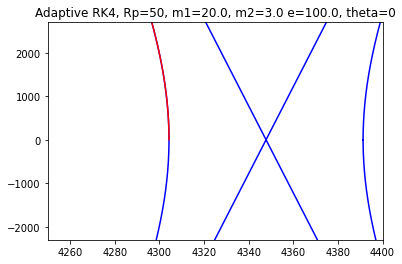

In [179]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-2300,2700)
plt.xlim(4250,4400)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor1,t,1),hyperbfns.getytheory(theta0,ecc0,semimajor1,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor0,t,-1),hyperbfns.getytheory(theta0,ecc0,semimajor0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'k')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

In [159]:
npstar2x

array([[ 4.30434783e+03,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  5.95695288e-01,  0.00000000e+00],
       [ 4.30434783e+03,  5.95695288e-03,  0.00000000e+00,
        -8.16243240e-09,  5.95695288e-01,  0.00000000e+00],
       [ 4.30434783e+03,  2.52548787e-02,  0.00000000e+00,
        -3.46051487e-08,  5.95695288e-01,  0.00000000e+00],
       ...,
       [ 4.27890251e+03,  5.34772335e+03,  0.00000000e+00,
        -4.60523919e-03,  5.93482130e-01,  0.00000000e+00],
       [ 4.27889836e+03,  5.34825748e+03,  0.00000000e+00,
        -4.60542046e-03,  5.93481903e-01,  0.00000000e+00],
       [ 4.27889422e+03,  5.34879162e+03,  0.00000000e+00,
        -4.60560169e-03,  5.93481677e-01,  0.00000000e+00]])

/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)
/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)


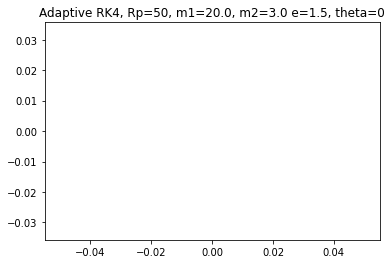

In [96]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor0,t,1),ellipsefns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor1,t,-1),ellipsefns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
#plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
#plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

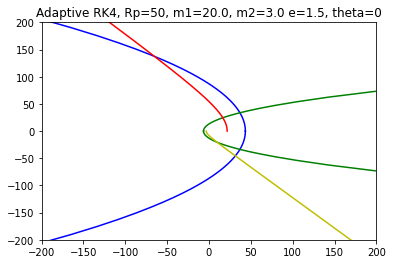

In [20]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
#plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
#plt.axis('equal')
xth1=parabfns.getxtheory(theta0,ecc0,semimajor1,t,1)
yth1=parabfns.getytheory(theta0,ecc0,semimajor1,t,1)
xth0=parabfns.getxtheory(theta0,ecc0,semimajor0,t,-1)
yth0=parabfns.getytheory(theta0,ecc0,semimajor0,t,-1)
plt.plot(xth1,yth1,'b')
plt.plot(xth0,yth0,'g')
#plt.plot(xth1,yth1,'o')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)
/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)


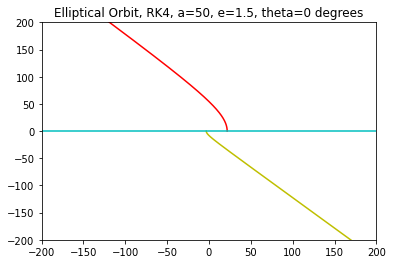

In [21]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)
/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)


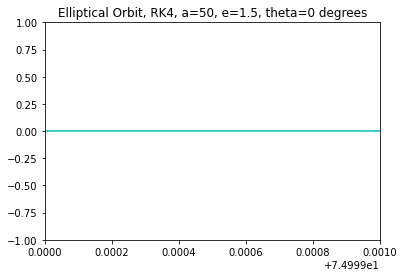

In [22]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

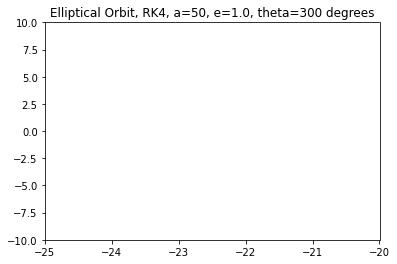

In [134]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [104]:
nperr

array([0.        , 0.00066336, 0.00098923, ..., 0.0032798 , 0.0032798 ,
       0.0032798 ])

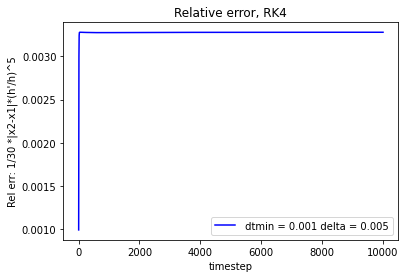

In [105]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

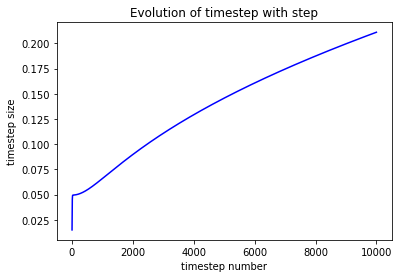

In [106]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

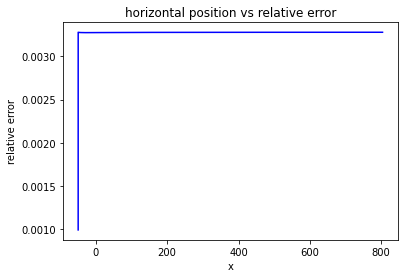

In [107]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

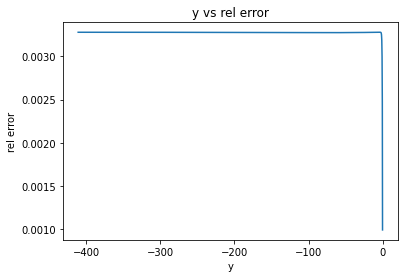

In [108]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

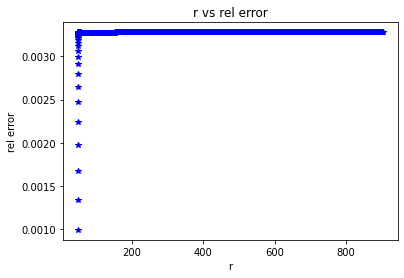

In [109]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

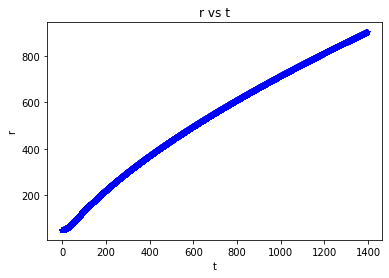

In [110]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [111]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

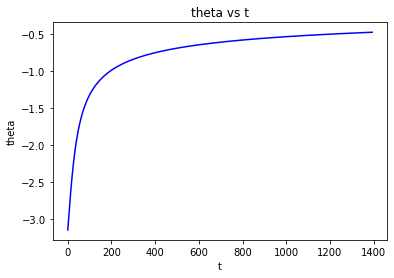

In [112]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

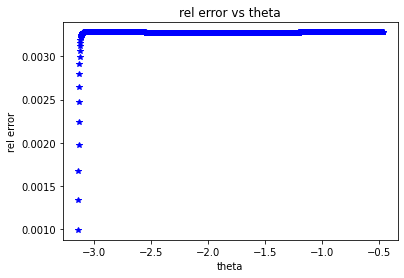

In [113]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5